# Master Thesis Script
## Loading original dataset & initial pre-processing

The dataset is loaded and the following pre-processing steps are done:
- only keep original tweets and retweets
- create clean text variable
- add DW-NOMINATE score variable
- match NewsGuard score to tweets, which required cleaning the URLs first

In [8]:
import pandas as pd
import json as json
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from math import log
import seaborn as sns
from statistics import mean
import random
from scipy.stats import powerlaw
import scipy
from pyvis.network import Network
import networkx as nx
import requests
from requests import get
import time
import csv

In [ ]:
!pip install pyvis

In [ ]:
!pip install powerlaw

In [493]:
import gzip
import shutil
with gzip.open(r'C:\Users\Simmendinger\Documents\Master Thesis Data/combined_US_politician_twitter_timelines_2010-11-06_to_2023-02-11_esther.csv.gzip', 'rb') as f_in:
    with open('file.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [494]:
data_long = pd.read_csv(r'C:\Users\Simmendinger\Downloads\file.txt', dtype={"id":str, "author_id":str}, header = None)


C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\2917718801.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,12,13,14,15,16,18,19,20,21,23,27,30,31,32,33,34,35,36,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,73,74,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data_long = pd.read_csv(r'C:\Users\Simmendinger\Downloads\file.txt', header = None)


In [498]:
data_long.columns = data_long.iloc[0]

In [499]:
data_long

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,public_metrics.impression_count,edit_history_tweet_ids,retweeted,quoted,reply
0,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,public_metrics.impression_count,edit_history_tweet_ids,retweeted,quoted,reply
1,1624129716553752576,1624129712153829378,1.6241297121538294e+18,NaN,NaN,211530910,211530910.0,NaN,NaN,2023-02-10 19:34:33+00:00,...,NaN,2023-02-11T13:46:25+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,682,"[""1624129716553752576""]",False,False,True
2,1624129712153829378,1624129712153829378,NaN,NaN,NaN,211530910,NaN,NaN,NaN,2023-02-10 19:34:32+00:00,...,NaN,2023-02-11T13:46:25+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,11768,"[""1624129712153829378""]",False,False,False
3,1623806642243399681,1623806642243399681,NaN,NaN,NaN,211530910,NaN,NaN,NaN,2023-02-09 22:10:47+00:00,...,NaN,2023-02-11T13:46:25+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,869,"[""1623806642243399681""]",False,False,False
4,1623806294363721728,1623806294363721728,NaN,1.6237930175711396e+18,NaN,211530910,NaN,15207668.0,NaN,2023-02-09 22:09:24+00:00,...,NaN,2023-02-11T13:46:25+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,34199,"[""1623806294363721728""]",True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952758,32566882645057536,32566882645057536,NaN,32555256655118336.0,NaN,210926192,NaN,15764644.0,NaN,2011-02-01 22:32:04+00:00,...,NaN,2023-02-11T19:42:51+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,0,"[""32566882645057536""]",True,False,False
5952759,32474908399247360,32474908399247360,NaN,NaN,NaN,210926192,NaN,NaN,NaN,2011-02-01 16:26:36+00:00,...,NaN,2023-02-11T19:42:51+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,0,"[""32474908399247360""]",False,False,False
5952760,32152320087162881,32152320087162881,NaN,32036071877382144.0,NaN,210926192,NaN,211921304.0,NaN,2011-01-31 19:04:45+00:00,...,NaN,2023-02-11T19:42:51+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,0,"[""32152320087162881""]",True,False,False
5952761,32126511347666945,32126511347666945,NaN,NaN,NaN,210926192,NaN,NaN,NaN,2011-01-31 17:22:11+00:00,...,NaN,2023-02-11T19:42:51+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.13.0,NaN,0,"[""32126511347666945""]",False,False,False


In [500]:
data_long = data_long.drop(0)

In [501]:
# Keep only original Tweets by removing retweets, quote tweets and replies

data_OG = data_long[(data_long['referenced_tweets.replied_to.id'].isna()) &  (data_long['referenced_tweets.quoted.id'].isna()) ]

In [502]:
# keep only tweets with URL
data_OG_2 = data_OG[(data_OG['entities.urls'].notna())]

In [503]:
data_OG_3 = data_OG_2[~data_OG_2['entities.urls'].str.contains("https://twitter.com")]

In [504]:
data_long = data_OG_3

In [505]:
data_long.columns

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'retweeted_user_id',
       'quoted_user_id', 'created_at', 'text', 'lang', 'source',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'public_metrics.retweet_count',
       'reply_settings', 'possibly_sensitive', 'withheld.scope',
       'withheld.copyright', 'withheld.country_codes', 'entities.annotations',
       'entities.cashtags', 'entities.hashtags', 'entities.mentions',
       'entities.urls', 'context_annotations', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author

In [507]:
data_long = data_long[["id", "author_id", "created_at", "referenced_tweets.retweeted.id", "retweeted_user_id", "text", "lang", "source", "public_metrics.retweet_count", "public_metrics.quote_count", "public_metrics.reply_count", "entities.hashtags", "entities.urls", "author.username", "author.name", "author.public_metrics.followers_count", "author.public_metrics.following_count", "author.public_metrics.tweet_count", "retweeted"]]

In [508]:
data_long["author_name"] = data_long["author.name"]

C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\1177139491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long["author_name"] = data_long["author.name"]


In [511]:
data_long

,id,author_id,created_at,referenced_tweets.retweeted.id,retweeted_user_id,text,lang,source,public_metrics.retweet_count,public_metrics.quote_count,public_metrics.reply_count,entities.hashtags,entities.urls,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,retweeted,author_name
21,1622975926433730562,211530910,2023-02-07 15:09:48+00:00,1.6229746292447314e+18,114756202.0,"Happening now: A joint Energy, Climate, &amp; ...",en,NaN,4,1,5,NaN,"[{""start"": 229, ""end"": 252, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,True,Rep. Bill Johnson
32,1621230645610414081,211530910,2023-02-02 19:34:41+00:00,NaN,NaN,"Today, I introduced the JOBS Act with @RepLBR,...",en,NaN,2,1,9,NaN,"[{""start"": 253, ""end"": 276, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,False,Rep. Bill Johnson
42,1619006992689004545,211530910,2023-01-27 16:18:41+00:00,NaN,NaN,Proud to announce that local high school stude...,en,NaN,0,0,0,NaN,"[{""start"": 220, ""end"": 243, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,False,Rep. Bill Johnson
44,1618731454506369024,211530910,2023-01-26 22:03:47+00:00,NaN,NaN,Rural communities across the country are dedic...,en,NaN,1,0,5,NaN,"[{""start"": 188, ""end"": 211, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,False,Rep. Bill Johnson
51,1618277493626273793,211530910,2023-01-25 15:59:55+00:00,1.6182728813346857e+18,17976923.0,"Every day, more Americans die from illicit fen...",en,NaN,6,0,15,NaN,"[{""start"": 238, ""end"": 261, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,True,Rep. Bill Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952571,83253658627747840,210926192,2011-06-21 19:23:13+00:00,NaN,NaN,@KINLKEPSNEWS Looking forward to visiting w yo...,en,NaN,0,0,0,NaN,"[{""start"": 87, ""end"": 106, ""url"": ""http://t.co...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar
5952572,83229717632786432,210926192,2011-06-21 17:48:05+00:00,NaN,NaN,"In May, 25 states have jobless rates significa...",en,NaN,2,0,0,NaN,"[{""start"": 93, ""end"": 112, ""url"": ""http://t.co...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar
5952574,80273770077622273,210926192,2011-06-13 14:02:12+00:00,NaN,NaN,TX accounts for 37% of net jobs added since ’0...,en,NaN,1,0,1,NaN,"[{""start"": 115, ""end"": 134, ""url"": ""http://t.c...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar
5952576,79291933746397184,210926192,2011-06-10 21:00:44+00:00,NaN,NaN,"My hometown, Laredo, ranks #1 in North America...",en,NaN,2,0,1,NaN,"[{""start"": 119, ""end"": 138, ""url"": ""http://t.c...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar


In [512]:
author_name = data_long.author_name.values.tolist()

In [513]:
author_name_new = []
for item in author_name:
    item_new = item.replace("Rep. ", "").lower()
    author_name_new.append(item_new)

In [514]:
se = pd.Series(author_name_new)
data_long['Author_Name_new'] = se.values

C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\2974530099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Author_Name_new'] = se.values


In [515]:
data_long

,id,author_id,created_at,referenced_tweets.retweeted.id,retweeted_user_id,text,lang,source,public_metrics.retweet_count,public_metrics.quote_count,...,entities.hashtags,entities.urls,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,retweeted,author_name,Author_Name_new
21,1622975926433730562,211530910,2023-02-07 15:09:48+00:00,1.6229746292447314e+18,114756202.0,"Happening now: A joint Energy, Climate, &amp; ...",en,NaN,4,1,...,NaN,"[{""start"": 229, ""end"": 252, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,True,Rep. Bill Johnson,bill johnson
32,1621230645610414081,211530910,2023-02-02 19:34:41+00:00,NaN,NaN,"Today, I introduced the JOBS Act with @RepLBR,...",en,NaN,2,1,...,NaN,"[{""start"": 253, ""end"": 276, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,False,Rep. Bill Johnson,bill johnson
42,1619006992689004545,211530910,2023-01-27 16:18:41+00:00,NaN,NaN,Proud to announce that local high school stude...,en,NaN,0,0,...,NaN,"[{""start"": 220, ""end"": 243, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,False,Rep. Bill Johnson,bill johnson
44,1618731454506369024,211530910,2023-01-26 22:03:47+00:00,NaN,NaN,Rural communities across the country are dedic...,en,NaN,1,0,...,NaN,"[{""start"": 188, ""end"": 211, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,False,Rep. Bill Johnson,bill johnson
51,1618277493626273793,211530910,2023-01-25 15:59:55+00:00,1.6182728813346857e+18,17976923.0,"Every day, more Americans die from illicit fen...",en,NaN,6,0,...,NaN,"[{""start"": 238, ""end"": 261, ""url"": ""https://t....",RepBillJohnson,Rep. Bill Johnson,43411,859,8303,True,Rep. Bill Johnson,bill johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952571,83253658627747840,210926192,2011-06-21 19:23:13+00:00,NaN,NaN,@KINLKEPSNEWS Looking forward to visiting w yo...,en,NaN,0,0,...,NaN,"[{""start"": 87, ""end"": 106, ""url"": ""http://t.co...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar,henry cuellar
5952572,83229717632786432,210926192,2011-06-21 17:48:05+00:00,NaN,NaN,"In May, 25 states have jobless rates significa...",en,NaN,2,0,...,NaN,"[{""start"": 93, ""end"": 112, ""url"": ""http://t.co...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar,henry cuellar
5952574,80273770077622273,210926192,2011-06-13 14:02:12+00:00,NaN,NaN,TX accounts for 37% of net jobs added since ’0...,en,NaN,1,0,...,NaN,"[{""start"": 115, ""end"": 134, ""url"": ""http://t.c...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar,henry cuellar
5952576,79291933746397184,210926192,2011-06-10 21:00:44+00:00,NaN,NaN,"My hometown, Laredo, ranks #1 in North America...",en,NaN,2,0,...,NaN,"[{""start"": 119, ""end"": 138, ""url"": ""http://t.c...",RepCuellar,Rep. Henry Cuellar,31197,3351,7334,False,Rep. Henry Cuellar,henry cuellar


In [516]:
data_long.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Data_20230426.json')

Adding the DW-NOMINATE Score variable by using a dataset that was available online (https://voteview.com/data), which includes US Congress Member Names and their DW-NOMINATE scores. This merging to our dataset took quite some processing because the Twitter handles and account names often differed and there was some need for standardizing the names. Manual matching also needed to be done.

In [357]:
# Load DW-NOMINATE Score
# Opening JSON file
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Data_20230418.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [360]:
author_name_new = data.Author_Name_new.values.tolist()

In [2]:
# Load DW-NOMINATE Score
# Opening JSON file
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\HS_Total.json')
  
# returns JSON object as 
# a dictionary
HS_Total = pd.read_json(f)
  
# Closing file
f.close()

In [6]:
HS_Total.to_csv(r"C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\HS_Total.csv")

In [9]:
name_lst = HS_Total.Member_Name.values.tolist()

In [11]:
print(name_lst[400:410])

['kay granger', 'rubén hinojosa', 'raymond eugene (gene) green', 'eddie bernice johnson', 'robert (rob) bishop', 'jason chaffetz', 'chris stewart', 'ludmya bourdeau (mia) love', 'peter welch', 'j. randy forbes']


In [10]:
print(data["Author_Name_new"][61000:610100])

311650     richard hudson press
311656     richard hudson press
311663     richard hudson press
311668     richard hudson press
311675     richard hudson press
                   ...         
2757117       senator roy blunt
2757121       senator roy blunt
2757122       senator roy blunt
2757125       senator roy blunt
2757126       senator roy blunt
Name: Author_Name_new, Length: 549100, dtype: object


In [ ]:
# extract rows from data df that are unique in the Author_Name_new column
# match those with the name_lst names
# add all cols from the HS_Total df to this sub-df
# first check what is unmatched
# then finally merge the sub-df to data again, on the Author_Name_new variable

In [17]:
print(len(author_name_new))

1293086


In [361]:
author_name_new_clean = list(dict.fromkeys(author_name_new))

In [13]:
print(author_name_new_clean[:10])

['bill johnson', 'adam kinzinger', 'joaquin castro', 'rick crawford', 'bill huizenga', 'morgan griffith', 'austin scott', 'scott desjarlais', 'archive: vicky hartzler', 'congressmember bass']


In [14]:
name_lst_clean = list(dict.fromkeys(name_lst))

In [15]:
print(len(author_name_new_clean))

892


In [17]:
print(len(name_lst_clean))

805


In [18]:
print(name_lst_clean[:20])

['barack obama', 'mike dennis rogers', 'terri sewell', 'martha roby', 'mo brooks', 'bradley byrne', 'gary james palmer', 'robert aderholt', 'donald edwin young', 'trent franks', 'raúl m. grijalva', 'ann kirkpatrick', 'paul gosar', 'david schweikert', 'kyrsten sinema', 'martha mcsally', 'ruben gallego', 'matthew james salmon', 'rick crawford', 'steve womack']


In [ ]:
lastname_lst = []
for item in name_lst_clean:
    match = re.search(pattern, item)
    if match!= None:
        lastname = match.group(1)
        lastname_lst.append(lastname)

In [38]:
tweet_lst = [None] * len(author_name_new_clean)
for i, author in enumerate(author_name_new_clean):
    for name in name_lst_clean:
        match = re.search(name, author)
        if match!= None:
            tweet_lst[i] = name
  

In [39]:
count = 0
unmatched_author = []
for item, author in zip(tweet_lst, author_name_new_clean):
    if item== None:
        count+=1
        unmatched_author.append(author)
        #print(author)
        #print("next")
        
print(count)

476


In [41]:
HS_member_lst = []
twitter_author_lst = []
for member, author in zip(tweet_lst, author_name_new_clean):
    if member != None:
        #print(member)
        HS_member_lst.append(member)
        #print(author)
        twitter_author_lst.append(author)
        #print("next")

In [43]:
df_correct_matches = pd.DataFrame()
df_correct_matches["HS_member_name"] = HS_member_lst
df_correct_matches["Twitter_author_name"] = twitter_author_lst

In [44]:
df_correct_matches

,HS_member_name,Twitter_author_name
0,bill johnson,bill johnson
1,adam kinzinger,adam kinzinger
2,joaquin castro,joaquin castro
3,rick crawford,rick crawford
4,bill huizenga,bill huizenga
...,...,...
411,greg walden,archive: greg walden
412,eddie bernice johnson,eddie bernice johnson
413,bill foster,bill foster
414,judy chu,judy chu


In [45]:
df_correct_matches.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Correct_Matches.json')

In [46]:
# clean unmatched authors
print(unmatched_author)

['morgan griffith', 'congressmember bass', 'jim mcgovern', 'anna g. eshoo', 'peter defazio', 'joe wilson', 'daniel webster', 'mike conaway', 'nanette barragán', 'dutch ruppersberger', 'linda sánchez', 'mac thornberry press', 'terri a. sewell', 'rick larsen', 'joe kennedy iii', 'anna eshoo for congress', 'jackie speier', 'hal rogers', 'ro khanna', 'elijah e. cummings', 'mike waltz', 'dave joyce', 'suzan delbene', 'former george holding', 'debbie wasserman schultz', 'tony cárdenas', 'robin kelly', 'bruce westerman', 'gary palmer', 'norma torres', 'don young', 'ken buck', 'barry loudermilk', 'elise stefanik', 'alex mooney', 'mark walker', 'jimmy panetta', 'john shimkus', 'andy biggs', 'tom carper', 'bill nelson', 'team schatz', 'dick durbin', 'mark kirk', 'grassley works', 'moran for kansas', 'team mitch (text mitch to 47137)', 'angus king campaign', 'ben cardin', 'ed markey', 'stabenow for senate', 'roger wicker', 'roybluntmo', 'team daines', 'booker for senate', 'tom udall', 'chuck schu

In [50]:
unmatched_authors_cleaned = []
for i in unmatched_author:
    i_new = re.sub("congressmember", "", i)
    i_new = re.sub("for\s*congress", "", i_new)
    i_new = re.sub("congress", "", i_new)
    i_new = re.sub("for\s*senate", "", i_new)
    i_new = re.sub("4\s*congress", "", i_new)
    i_new = re.sub("4\s*senate", "", i_new)
    i_new = re.sub("team", "", i_new)
    i_new = re.sub("campaign", "", i_new)
    i_new = re.sub("congresswoman", "", i_new)
    i_new = re.sub("congressman", "", i_new)
    i_new = re.sub("senator", "", i_new)
    unmatched_authors_cleaned.append(i_new)

In [51]:
print(unmatched_authors_cleaned)

['morgan griffith', ' bass', 'jim mcgovern', 'anna g. eshoo', 'peter defazio', 'joe wilson', 'daniel webster', 'mike conaway', 'nanette barragán', 'dutch ruppersberger', 'linda sánchez', 'mac thornberry press', 'terri a. sewell', 'rick larsen', 'joe kennedy iii', 'anna eshoo ', 'jackie speier', 'hal rogers', 'ro khanna', 'elijah e. cummings', 'mike waltz', 'dave joyce', 'suzan delbene', 'former george holding', 'debbie wasserman schultz', 'tony cárdenas', 'robin kelly', 'bruce westerman', 'gary palmer', 'norma torres', 'don young', 'ken buck', 'barry loudermilk', 'elise stefanik', 'alex mooney', 'mark walker', 'jimmy panetta', 'john shimkus', 'andy biggs', 'tom carper', 'bill nelson', ' schatz', 'dick durbin', 'mark kirk', 'grassley works', 'moran for kansas', ' mitch (text mitch to 47137)', 'angus king ', 'ben cardin', 'ed markey', 'stabenow ', 'roger wicker', 'roybluntmo', ' daines', 'booker ', 'tom udall', 'chuck schumer', 'richard burr', 'hoeven ', 'portman', 'wyden for oregon', 'b

In [53]:
tweet_lst_unmatched = [None] * len(unmatched_authors_cleaned)
for i, author in enumerate(unmatched_authors_cleaned):
    for name in name_lst_clean:
        match = re.search(author, name)
        if match!= None:
            tweet_lst[i] = name

In [54]:
for member, author in zip(tweet_lst_unmatched, unmatched_authors_cleaned):
    if member != None:
        print(member)
        #member_lst.append(member)
        print(author)
        #twitter_author_lst.append(author)
        print("next")

In [55]:
lastname1 = r"\w+ \w+\. (\w+)"
lastname2 = r"\w+ \w+ (\w+)"
lastname3 = r"\w+ (\w+)"
lastname_lst = []
for item in name_lst_clean:
    item_new = re.search(lastname1, item)
    item_new_2 = re.search(lastname2, item)
    item_new_3 = re.search(lastname3, item)
    if item_new != None:
        #print(item)
        #print(item_new.group(1))
        #print("next")
        lastname_lst.append(item_new.group(1))
    elif item_new_2 != None:
        #print(item)
        #print(item_new_2.group(1))
        #print("next")
        lastname_lst.append(item_new_2.group(1))
    elif item_new_3 != None:
        #print(item)
        #print(item_new_3.group(1))
        #print("next")
        lastname_lst.append(item_new_3.group(1))
    else:
        lastname_lst.append(item)

In [67]:
lastname1 = r"\w+ \w+\. (\w+)"
lastname2 = r"\w+ \w+ (\w+)"
lastname3 = r"\w+ (\w+)"
unmatched_authors_lastname_lst = []
for item in unmatched_authors_cleaned:
    item_new = re.search(lastname1, item)
    item_new_2 = re.search(lastname2, item)
    item_new_3 = re.search(lastname3, item)
    if item_new != None:
        #print(item)
        #print(item_new.group(1))
        #print("next")
        unmatched_authors_lastname_lst.append(item_new.group(1))
    elif item_new_2 != None:
        #print(item)
        #print(item_new_2.group(1))
        #print("next")
        unmatched_authors_lastname_lst.append(item_new_2.group(1))
    elif item_new_3 != None:
        #print(item)
        #print(item_new_3.group(1))
        #print("next")
        unmatched_authors_lastname_lst.append(item_new_3.group(1))
    else:
        unmatched_authors_lastname_lst.append(item)

In [69]:
print(unmatched_authors_lastname_lst[:20])

['griffith', ' bass', 'mcgovern', 'eshoo', 'defazio', 'wilson', 'webster', 'conaway', 'barragán', 'ruppersberger', 'sánchez', 'press', 'sewell', 'larsen', 'iii', 'eshoo', 'speier', 'rogers', 'khanna', 'cummings']


In [75]:
tweet_lst_unmatched = [None] * len(unmatched_authors_cleaned)
for i, author in enumerate(unmatched_authors_lastname_lst):
    for name, lastname in zip(name_lst_clean, lastname_lst):
        match = re.search(author, lastname)
        if match!= None:
            #print(match.group(0))
            tweet_lst_unmatched[i] = name

In [65]:
print(len(tweet_lst_unmatched))

476


In [81]:
member_lst_new = []
twitter_author_lst_new = []
count = 0
for member, author in zip(tweet_lst_unmatched, unmatched_authors_cleaned):
    if member != None:
        #print(member)
        member_lst_new.append(member)
        #print(author)
        twitter_author_lst_new.append(author)
        #print("next")
        count+=1
        
print(count)

322


In [82]:
df_correct_matches_2 = pd.DataFrame()
df_correct_matches_2["HS_member_name"] = member_lst_new
df_correct_matches_2["Twitter_author_name"] = twitter_author_lst_new

In [98]:
df_correct_matches_updated = df_correct_matches.append(df_correct_matches_2)

C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\1656241251.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_correct_matches_updated = df_correct_matches.append(df_correct_matches_2)


In [101]:
df_correct_matches_updated

,index,HS_member_name,Twitter_author_name
0,0,bill johnson,bill johnson
1,1,adam kinzinger,adam kinzinger
2,2,joaquin castro,joaquin castro
3,3,rick crawford,rick crawford
4,4,bill huizenga,bill huizenga
...,...,...,...
733,317,raúl m. grijalva,raul m. grijalva
734,318,james a. himes,jim himes 🇺🇸🇺🇦
735,319,david eugene price,david e. price
736,320,grace flores napolitano,rep.grace napolitano


In [100]:
df_correct_matches_updated.reset_index(inplace = True)

In [102]:
df_correct_matches_updated.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Correct_Matches_Updated.json')

In [79]:
count = 0
unmatched_author_2 = []
for item, author in zip(tweet_lst_unmatched, author_name_new_clean):
    if item== None:
        count+=1
        unmatched_author_2.append(author)
        #print(author)
        #print("next")
        
print(count)

154


In [103]:
print(unmatched_author_2)

['adam kinzinger', 'archive: vicky hartzler', 'paul gosar, dds', 'jim costa', 'joe wilson', 'adrian smith', 'dutch ruppersberger', 'congresswoman madeleine dean', 'doug lamborn', 'ro khanna', 'elijah e. cummings', 'dave joyce', 'dan kildee', 'ann wagner', 'former george holding', 'doug collins', 'ted yoho', 'sean patrick maloney', 'roger williams', 'tony cárdenas', 'congresswoman julia brownley', 'robin kelly', 'jim hagedorn', 'ken buck', 'brian babin', 'alex mooney', 'mark walker', 'john katko', 'glenn grothman', 'darin lahood', 'david trone', 'andy biggs', 'warren davidson', 'dianne feinstein', 'richard blumenthal', 'team mitch (text mitch to 47137)', 'dean heller', 'jeanne shaheen', 'chuck schumer', 'sherrod brown', 'james lankford', 'sheldon whitehouse', 'john thune', 'team cornyn', 'mark warner hq', 'capito for wv', 'john barrasso', 'rand paul', 'senator chris van hollen', 'senator tina smith', 'senator thom tillis', 'senator mike rounds', 'tina smith', 'cindy hyde-smith', 'maggie

In [104]:

unmatched_author_2_clean = ['adam kinzinger', 'vicky hartzler', 'paul gosar', 'jim costa', 'joe wilson', 'adrian smith', 'dutch ruppersberger', 'madeleine dean', 'doug lamborn', 'ro khanna', 'elijah e. cummings', 'dave joyce', 'dan kildee', 'ann wagner', 'george holding', 'doug collins', 'ted yoho', 'sean patrick maloney', 'roger williams', 'tony cárdenas', 'julia brownley', 'robin kelly', 'jim hagedorn', 'ken buck', 'brian babin', 'alex mooney', 'mark walker', 'john katko', 'glenn grothman', 'darin lahood', 'david trone', 'andy biggs', 'warren davidson', 'dianne feinstein', 'richard blumenthal', 'team mitch', 'dean heller', 'jeanne shaheen', 'chuck schumer', 'sherrod brown', 'james lankford', 'sheldon whitehouse', 'john thune', 'cornyn', 'mark warner', 'capito', 'john barrasso', 'rand paul', 'chris van hollen', 'tina smith', 'thom tillis', 'mike rounds', 'tina smith', 'cindy hyde-smith', 'maggie hassan', 'angie craig', 'kevin brady', 'brendan boyle', 'conor lamb', 'dave loebsack', 'dwight evans', 'adriano espaillat', 'chrissy houlahan', 'jason smith', 'john joyce', 'pete king', 'bob latta', 'marcia l. fudge', 'kathleen rice', 'langevin', 'lloyd doggett', 'louie gohmert', 'mac thornberry', 'mark pocan', 'markwayne mullin', 'max rose', 'mike kelly', 'mike turner', 'pete stauber', 'cohens', 'rob wittman', 'tom malinowski', 'steve stivers', 'tim burchett', 'tom emmer', 'lou correa', 'susan wild', 'chris stewart', 'susie lee', 'ken calvert', 'cathy mcmorris rodgers', 'team meadows', 'nancy pelosi', 'pete visclosky', 'tom suozzi', 'tom reed', 'fred upton', 'randy weber', 'will hurd', 'greg murphy', 'mike levin', 'raul ruiz', 'murphy office', 'menendez', 'kevin cramer', 'kyrsten sinema', 'dan sullivan', 'van taylor', 'joe neguse', 'andy kim', 'rashida tlaib', 'lori trahan', 'elaine luria', 'antonio delgado', 'ayanna pressley', 'drew ferguson', 'brian fitzpatrick', 'brett guthrie', 'bradley byrne', 'john moolenaar', 'brenda lawrence', 'dan newhouse', 'brian mast', 'guy reschenthaler', 'mike johnson', 'andy harris', 'daniel lipinski', 'mark takano', 'alan lowenthal', 'mary gay scanlon', 'carolyn b. maloney', 'jim clyburn', 'donald mceachin', 'kendra horn', 'john rose', 'josh gottheimer', 'kathy castor', 'patrick mchenry', 'mike gallagher', 'nydia m velázquez', 'deb haaland', 'stephen f. lynch', 'fred keller', 'lance gooden', 'carol miller', 'ed case', 'lucy mcbath', 'jake auchincloss', 'josh brecheen', 'jasmine crockett', 'chuck edwards', 'jake ellzey', 'scott franklin', 'maxwell alejandro frost']


In [116]:
pattern = r"\b(\w+)$"
unmatched_author_2_clean_lastnames = []

for author in unmatched_author_2_clean:
    match = re.search(pattern, author)
    if match != None:
        lastname = match.group(1)
        unmatched_author_2_clean_lastnames.append(lastname)

In [117]:
print(unmatched_author_2_clean_lastnames)

['kinzinger', 'hartzler', 'gosar', 'costa', 'wilson', 'smith', 'ruppersberger', 'dean', 'lamborn', 'khanna', 'cummings', 'joyce', 'kildee', 'wagner', 'holding', 'collins', 'yoho', 'maloney', 'williams', 'cárdenas', 'brownley', 'kelly', 'hagedorn', 'buck', 'babin', 'mooney', 'walker', 'katko', 'grothman', 'lahood', 'trone', 'biggs', 'davidson', 'feinstein', 'blumenthal', 'mitch', 'heller', 'shaheen', 'schumer', 'brown', 'lankford', 'whitehouse', 'thune', 'cornyn', 'warner', 'capito', 'barrasso', 'paul', 'hollen', 'smith', 'tillis', 'rounds', 'smith', 'smith', 'hassan', 'craig', 'brady', 'boyle', 'lamb', 'loebsack', 'evans', 'espaillat', 'houlahan', 'smith', 'joyce', 'king', 'latta', 'fudge', 'rice', 'langevin', 'doggett', 'gohmert', 'thornberry', 'pocan', 'mullin', 'rose', 'kelly', 'turner', 'stauber', 'cohens', 'wittman', 'malinowski', 'stivers', 'burchett', 'emmer', 'correa', 'wild', 'stewart', 'lee', 'calvert', 'rodgers', 'meadows', 'pelosi', 'visclosky', 'suozzi', 'reed', 'upton', '

In [118]:
tweet_lst_unmatched_2 = [None] * len(unmatched_author_2_clean)
for i, author in enumerate(unmatched_author_2_clean_lastnames):
    for name, lastname in zip(name_lst_clean, lastname_lst):
        match = re.search(author, lastname)
        if match!= None:
            #print(match.group(0))
            tweet_lst_unmatched_2[i] = name

In [121]:
unmatched_final = []
member_lst_3 = []
twitter_author_lst_3 = []
count = 0
for item, author in zip(tweet_lst_unmatched_2,unmatched_author_2):
    if item == None:
        unmatched_final.append(author)
        count+=1
    else:
        #print(item)
        member_lst_3.append(item)
        #print(author)
        twitter_author_lst_3.append(author)
        #print("next")
        #pass
print(count)

15


In [122]:
df_correct_matches_3 = pd.DataFrame()
df_correct_matches_3["HS_member_name"] = member_lst_3
df_correct_matches_3["Twitter_author_name"] = twitter_author_lst_3

In [123]:
df_correct_matches_updated_2 = df_correct_matches_updated.append(df_correct_matches_3)

C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\3776123843.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_correct_matches_updated_2 = df_correct_matches_updated.append(df_correct_matches_3)


In [124]:
df_correct_matches_updated_2.reset_index(inplace = True)

In [125]:
df_correct_matches_updated_2

,level_0,index,HS_member_name,Twitter_author_name
0,0,0.0,bill johnson,bill johnson
1,1,1.0,adam kinzinger,adam kinzinger
2,2,2.0,joaquin castro,joaquin castro
3,3,3.0,rick crawford,rick crawford
4,4,4.0,bill huizenga,bill huizenga
...,...,...,...,...
872,134,NaN,lucy mcbath,lucy mcbath
873,135,NaN,jake auchincloss,jake auchincloss
874,136,NaN,donna f. edwards,congressman chuck edwards
875,137,NaN,jake ellzey,jake ellzey


In [126]:
df_correct_matches_updated_2.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Correct_Matches_Updated_2.json')

In [128]:
# final 15 unmatched
print(unmatched_final)

['former george holding', 'tony cárdenas', 'chuck schumer', 'senator thom tillis', 'senator mike rounds', 'mac thornberry', 'cohen for congress', 'tom emmer', 'tom reed', 'sen. murphy office', 'congressman drew ferguson', 'nydia m velázquez', 'congressman josh brecheen', 'congresswoman jasmine crockett', 'congressman maxwell alejandro frost']


In [149]:
final_unmatched_authors_clean_membernames = ['george e.b. holding','cátony rdenas', 'charles ellis (chuck) schumer', 'thomas roland (thom) tillis', 'marion michael (mike) rounds', 'william mcclellan (mac) thornberry', 'stephen cohen', 'thomas earl ii emmer', 'thomas w. ii reed', 'christopher murphy', 'anderson drew iv ferguson', 'velánydia m. zquez', None, None, None]

In [150]:
print(len(final_unmatched_authors_clean_membernames))

15


In [ ]:
# 3 Twitter authors were not found to have DW-NOMINATE score

In [151]:
df_correct_matches_4 = pd.DataFrame()
df_correct_matches_4["HS_member_name"] = final_unmatched_authors_clean_membernames
df_correct_matches_4["Twitter_author_name"] = unmatched_final

In [152]:
df_correct_matches_updated_3 = df_correct_matches_updated_2.append(df_correct_matches_4)

C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\1771082291.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_correct_matches_updated_3 = df_correct_matches_updated_2.append(df_correct_matches_4)


In [154]:
df_correct_matches_updated_3

,level_0,index,HS_member_name,Twitter_author_name
0,0.0,0.0,bill johnson,bill johnson
1,1.0,1.0,adam kinzinger,adam kinzinger
2,2.0,2.0,joaquin castro,joaquin castro
3,3.0,3.0,rick crawford,rick crawford
4,4.0,4.0,bill huizenga,bill huizenga
...,...,...,...,...
10,NaN,NaN,anderson drew iv ferguson,congressman drew ferguson
11,NaN,NaN,velánydia m. zquez,nydia m velázquez
12,NaN,NaN,None,congressman josh brecheen
13,NaN,NaN,None,congresswoman jasmine crockett


In [159]:
df_correct_matches_updated_3 = df_correct_matches_updated_3[["HS_member_name", "Twitter_author_name"]]

In [157]:
df_correct_matches_updated_3.reset_index(inplace = True)

In [162]:
df_correct_matches_updated_3

,HS_member_name,Twitter_author_name
0,bill johnson,bill johnson
1,adam kinzinger,adam kinzinger
2,joaquin castro,joaquin castro
3,rick crawford,rick crawford
4,bill huizenga,bill huizenga
...,...,...
887,anderson drew iv ferguson,congressman drew ferguson
888,velánydia m. zquez,nydia m velázquez
889,None,congressman josh brecheen
890,None,congresswoman jasmine crockett


In [161]:
df_correct_matches_updated_3.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Correct_Matches_Updated_3.json')

In [34]:
print(len(author_name_new_clean))

892


In [164]:
for i, row in df_correct_matches_updated_3.iterrows():
    print(row["HS_member_name"])
    print(row["Twitter_author_name"])
    print("next")


bill johnson
bill johnson
next
adam kinzinger
adam kinzinger
next
joaquin castro
joaquin castro
next
rick crawford
rick crawford
next
bill huizenga
bill huizenga
next
austin scott
austin scott
next
scott desjarlais
scott desjarlais
next
vicky hartzler
archive: vicky hartzler
next
paul gosar
paul gosar, dds
next
scott tipton
scott tipton
next
jim costa
jim costa
next
john sarbanes
john sarbanes
next
cedric richmond
rep cedric richmond
next
ann kirkpatrick
ann kirkpatrick
next
scott peters
scott peters
next
adrian smith
adrian smith
next
jared huffman
jared huffman
next
rick w. allen
rick w. allen
next
steven horsford
steven horsford
next
barbara lee
barbara lee
next
hakeem jeffries
hakeem jeffries
next
dave loebsack
archive: dave loebsack (retired us rep)
next
madeleine dean
congresswoman madeleine dean
next
doug lamborn
doug lamborn
next
garret graves
garret graves
next
ross spano
ross spano
next
richard hudson
richard hudson press
next
eric swalwell
eric swalwell
next
diana degette
di

In [165]:
df_correct_matches_updated_3.to_csv(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Correct_Matches_Updated_3.csv')

In [167]:
df_falsematches = pd.read_excel(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\FalseMatches_20230425.xlsx')

In [172]:
print(name_lst_clean)

['barack obama', 'mike dennis rogers', 'terri sewell', 'martha roby', 'mo brooks', 'bradley byrne', 'gary james palmer', 'robert aderholt', 'donald edwin young', 'trent franks', 'raúl m. grijalva', 'ann kirkpatrick', 'paul gosar', 'david schweikert', 'kyrsten sinema', 'martha mcsally', 'ruben gallego', 'matthew james salmon', 'rick crawford', 'steve womack', 'french hill', 'bruce eugene westerman', 'nancy pelosi', 'dana rohrabacher', 'mike honda', 'adam schiff', 'darrell issa', 'susan a. davis', 'devin nunes', 'sálinda t. nchez', 'jim costa', 'doris matsui', 'jerry mcnerney', 'kevin mccarthy', 'karen lorraine jacqueline (jackie) speier', 'tom mcclintock', 'judy chu', 'john garamendi', 'duncan duane hunter', 'jeff denham', 'karen bass', 'janice hahn', 'doug lamalfa', 'jared huffman', 'ami bera', 'paul cook', 'eric swalwell', 'david g. valadao', 'julia brownley', 'cátony rdenas', 'raul ruiz', 'mark takano', 'alan lowenthal', 'juan vargas', 'scott peters', 'mark james desaulnier', 'steve 

In [169]:
df_falsematches

,Member name,Author name
0,Frederica wilson,Joe wilson
1,Ayanna pressley,Mac thornberry press
2,Joseph albert iii hollingsworth,Joe kennedy iii
3,Mike dennis rogers,Hal rogers
4,Mark edward kelly,Robin kelly
...,...,...
83,Dustin johnson,Mike johnson
84,Kamala devi harris,"Andy harris, md"
85,Madison cawthorn,Kendra horn
86,Mary e. miller,Carol miller


In [319]:
correct_member_names = ["addison graves (joe) wilson", "william mcclellan (mac) thornberry", 
                        "joseph p. iii kennedy", "harold dallas (hal) rogers", "robin l. kelly", 
                        "norma judith torres", "donald edwin young", "addison mitchell (mitch) mcconnell",
                        "gordon douglas (doug) jones", "peter t. king", "kathleen maura rice",
                        "michael thompson", "michael r. turner", "timothy j. ryan", None, "o'thomas c. halleran",
                        "watson bonnie coleman", "kathleen maura rice", "mark green", "gwendolynne s. (gwen) moore",
                        "john r. carter", "john r. carter", "mike collins", "de la monica cruz", "d'anthony esposito",
                        "chuck edwards","maxwell frost","robert garcia","wesley hunt","jonathan jackson","laurel lee",
                        "rich mccormick","nathaniel moran",
                        "zach nunn","dale strong","van jefferson drew", "van beth duyne","michael waltz", "brandon williams", "christopher murphy",
                        "marco rubio","addison mitchell (mitch) mcconnell", "thomas (tom) udall",
                        "jefferson beauregard iii (jeff) sessions", "valdez butler demings", "bennie thompson",
                        "charles roy", None,"robert c. scott", "richard lynn (rick) scott","gordon douglas (doug) jones",
                        "joshua david hawley","james risch","san michael nicolas", "miller-mariannette meeks",
                        "garland h. (andy) iv barr", "sanford jr. bishop", "michael r. turner", "jackson sheila lee",
                        "gwendolynne s. (gwen) moore", "walter jr. jones", "samuel graves", "robin l. kelly",
                        "timothy j. ryan","gregory w. meeks","addison graves (joe) wilson", "adrian smith",
                        "david joyce", "doug collins", "sean patrick maloney","roger williams", "robin l. kelly",
                        "addison mitchell (mitch) mcconnell", "tina smith", "tina smith", "jason smith", "kathleen maura rice",
                        "max rose", "mike kelly", "michael r. turner", "mike levin", None, "andy kim",
                        "mike johnson", "andy harris", "kendra horn", "carol miller", "chuck edwards"]

In [320]:
print(len(correct_member_names))

88


In [321]:
df_falsematches["Correct Member name"] = correct_member_names

In [341]:
df_falsematches_clean = df_falsematches[["Author name", "Correct Member name"]]

In [266]:
for item in name_lst_clean:
    if "strong" in item:
        print(item)

kelly armstrong


In [275]:
HS_2018 = pd.read_csv(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\HS118_Members.csv')

In [328]:
party_lst = HS_2018.party_code.values.tolist()

In [330]:
party_lst_new = []
for item in party_lst:
    if item == 200:
        party_lst_new.append("Republican")
    else:
        party_lst_new.append("Democrat")

In [331]:
HS_2018["Party"] = party_lst_new

In [373]:
HS_Total.columns

Index(['chamber', 'party_code', 'state_abbrev', 'bioname', 'nominate_dim1',
       'nominate_dim2', 'nominate_geo_mean_probability', 'Congress', 'Party',
       'Member_Name'],
      dtype='object')

In [375]:
HS_2018["Congress"] = HS_2018["congress"]

In [378]:
HS_2018_short = HS_2018[['chamber', 'party_code', 'state_abbrev', 'bioname', 'nominate_dim1',
       'nominate_dim2', 'nominate_geo_mean_probability', 'Congress', 'Party',
       'Member_Name']]

In [379]:
HS_2018_short

,chamber,party_code,state_abbrev,bioname,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,Congress,Party,Member_Name
0,House,200,AL,"ROGERS, Mike Dennis",0.362,0.462,0.97613,118,Republican,mike dennis rogers
1,House,100,AL,"SEWELL, Terri",-0.394,0.397,0.95377,118,Democrat,terri sewell
2,House,200,AL,"PALMER, Gary James",0.677,0.095,0.95909,118,Republican,gary james palmer
3,House,200,AL,"CARL, Jerry L.",0.507,0.535,0.96943,118,Republican,jerry l. carl
4,House,200,AL,"MOORE, Barry",0.641,-0.118,0.95935,118,Republican,barry moore
...,...,...,...,...,...,...,...,...,...,...
536,Senate,100,WV,"MANCHIN, Joe, III",-0.060,0.410,0.81604,118,Democrat,iii manchin
537,Senate,100,WI,"BALDWIN, Tammy",-0.493,-0.134,0.94724,118,Democrat,tammy baldwin
538,Senate,200,WI,"JOHNSON, Ron",0.626,-0.147,0.89896,118,Republican,ron johnson
539,Senate,200,WY,"LUMMIS, Cynthia M.",0.692,-0.352,0.88432,118,Republican,cynthia m. lummis


In [380]:
HS_Total_new = HS_Total.append(HS_2018_short)

C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\2445875835.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  HS_Total_new = HS_Total.append(HS_2018_short)


In [381]:
HS_Total_new

,chamber,party_code,state_abbrev,bioname,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,Congress,Party,Member_Name
0,President,100,USA,"OBAMA, Barack",-0.358,-0.197,NaN,114,Democrat,barack obama
1,House,200,AL,"ROGERS, Mike Dennis",0.362,0.462,0.88444,114,Republican,mike dennis rogers
2,House,100,AL,"SEWELL, Terri",-0.394,0.397,0.84493,114,Democrat,terri sewell
3,House,200,AL,"ROBY, Martha",0.362,0.658,0.91953,114,Republican,martha roby
4,House,200,AL,"BROOKS, Mo",0.652,-0.417,0.78593,114,Republican,mo brooks
...,...,...,...,...,...,...,...,...,...,...
536,Senate,100,WV,"MANCHIN, Joe, III",-0.060,0.410,0.81604,118,Democrat,iii manchin
537,Senate,100,WI,"BALDWIN, Tammy",-0.493,-0.134,0.94724,118,Democrat,tammy baldwin
538,Senate,200,WI,"JOHNSON, Ron",0.626,-0.147,0.89896,118,Republican,ron johnson
539,Senate,200,WY,"LUMMIS, Cynthia M.",0.692,-0.352,0.88432,118,Republican,cynthia m. lummis


In [335]:
HS_Total_new.to_csv(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\HS_Total_new.csv')

In [285]:

member_lst = HS_2018.bioname.values.tolist()

In [286]:
print(member_lst)

['ROGERS, Mike Dennis', 'SEWELL, Terri', 'PALMER, Gary James', 'CARL, Jerry L.', 'MOORE, Barry', 'STRONG, Dale', 'ADERHOLT, Robert', 'PELTOLA, Mary Sattler', 'RADEWAGEN, Aumua Amata Coleman', 'GRIJALVA, Raúl M.', 'GOSAR, Paul', 'SCHWEIKERT, David', 'GALLEGO, Ruben', 'BIGGS, Andrew S.', 'LESKO, Debbie', 'STANTON, Greg', 'CISCOMANI, Juan', 'CRANE, Eli', 'CRAWFORD, Rick', 'WOMACK, Steve', 'HILL, French', 'WESTERMAN, Bruce Eugene', 'PELOSI, Nancy', 'SCHIFF, Adam', 'ISSA, Darrell', 'SÁNCHEZ, Linda T.', 'COSTA, Jim', 'MATSUI, Doris', 'MCCARTHY, Kevin', 'McCLINTOCK, Tom', 'CHU, Judy', 'GARAMENDI, John', 'LaMALFA, Doug', 'HUFFMAN, Jared', 'BERA, Ami', 'SWALWELL, Eric', 'VALADAO, David G.', 'BROWNLEY, Julia', 'CÁRDENAS, Tony', 'RUIZ, Raul', 'TAKANO, Mark', 'VARGAS, Juan', 'PETERS, Scott', 'DESAULNIER, Mark James', 'AGUILAR, Peter Rey', 'LIEU, Ted', 'TORRES, Norma Judith', 'BARRAGÁN, Nanette Diaz', 'CARBAJAL, Salud', 'CORREA, Jose Luis', 'KHANNA, Rohit', 'PANETTA, James Varni', 'GOMEZ, Jimmy', '

In [296]:
member_lst_fixed = []
for item in member_lst:
    item_new = item.lower()
    #print(item_new)
    match_lastname = re.search(r"(\w+),", item_new)
    firstname = re.sub(r"(\w+), ", "", item_new)
    #print(firstname)
    lastname = match_lastname.group(1)
    #print(match_lastname.group(1))
    item_fixed = firstname + " " + lastname
    #print(item_fixed)
    
    member_lst_fixed.append(item_fixed)

In [298]:
HS_2018["Member_Name"] = member_lst_fixed

In [317]:
for item in member_lst_fixed:
    if "edwards" in item:
        print(item)

chuck edwards


In [299]:
for i, row in df_falsematches.iterrows():
    #print(row["Member name"])
    if row["Correct Member name"] == None:
        
        print(row["Author name"])
        print("next")

Van taylor
next
Mike collins
next
Monica de la cruz
next
Anthony d'esposito
next
Man chuck edwards
next
Man maxwell alejandro frost
next
Man robert garcia
next
Wesley hunt press office
next
Jonathan jackson
next
Woman laurel lee
next
Rich mccormick
next
Man nathaniel moran
next
Man zach nunn
next
Dale w. strong
next
Brandon williams
next
Man greg steube
next
Rep van taylor
next
Congressman chuck edwards
next


In [297]:
print(member_lst_fixed)

['mike dennis rogers', 'terri sewell', 'gary james palmer', 'jerry l. carl', 'barry moore', 'dale strong', 'robert aderholt', 'mary sattler peltola', 'aumua amata coleman radewagen', 'raúl m. grijalva', 'paul gosar', 'david schweikert', 'ruben gallego', 'andrew s. biggs', 'debbie lesko', 'greg stanton', 'juan ciscomani', 'eli crane', 'rick crawford', 'steve womack', 'french hill', 'bruce eugene westerman', 'nancy pelosi', 'adam schiff', 'darrell issa', 'linda t. sánchez', 'jim costa', 'doris matsui', 'kevin mccarthy', 'tom mcclintock', 'judy chu', 'john garamendi', 'doug lamalfa', 'jared huffman', 'ami bera', 'eric swalwell', 'david g. valadao', 'julia brownley', 'tony cárdenas', 'raul ruiz', 'mark takano', 'juan vargas', 'scott peters', 'mark james desaulnier', 'peter rey aguilar', 'ted lieu', 'norma judith torres', 'nanette diaz barragán', 'salud carbajal', 'jose luis correa', 'rohit khanna', 'james varni panetta', 'jimmy gomez', 'josh harder', 'mike levin', 'katie porter', 'mike gar

In [337]:
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Correct_Matches_Updated_3.json')
  
# returns JSON object as 
# a dictionary
correct_matches_updated_3 = pd.read_json(f)
  
# Closing file
f.close()

In [343]:
df_falsematches_clean["Twitter_author_name"] = df_falsematches_clean["Author name"]
df_falsematches_clean["HS_member_name"] = df_falsematches_clean["Correct Member name"]


In [347]:
df_falsematches_clean = df_falsematches_clean[["Twitter_author_name", "HS_member_name"]]

In [348]:
df_falsematches_clean

,Twitter_author_name,HS_member_name
0,Joe wilson,addison graves (joe) wilson
1,Mac thornberry press,william mcclellan (mac) thornberry
2,Joe kennedy iii,joseph p. iii kennedy
3,Hal rogers,harold dallas (hal) rogers
4,Robin kelly,robin l. kelly
...,...,...
83,Mike johnson,mike johnson
84,"Andy harris, md",andy harris
85,Kendra horn,kendra horn
86,Carol miller,carol miller


In [349]:
correct_matches_updated_4 = correct_matches_updated_3.append(df_falsematches_clean)

C:\Users\Simmendinger\AppData\Local\Temp\ipykernel_4724\2037976209.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correct_matches_updated_4 = correct_matches_updated_3.append(df_falsematches_clean)


In [351]:
correct_matches_updated_4.reset_index(inplace = True)

In [354]:
correct_matches_updated_4 = correct_matches_updated_4[["Twitter_author_name", "HS_member_name"]]

In [356]:
correct_matches_updated_4.to_csv(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\Correct_Matches_Updated_4.csv')+

In [ ]:
# now we have our final matches
# now we can merge this first with the no duplicate twitter author list
# after that, merge it with the no duplicate HS member name list
# then merge it with the total twitter datset

In [367]:
print(author_name_new_clean[:20])

['bill johnson', 'adam kinzinger', 'joaquin castro', 'rick crawford', 'bill huizenga', 'morgan griffith', 'austin scott', 'scott desjarlais', 'archive: vicky hartzler', 'congressmember bass', 'paul gosar, dds', 'jim mcgovern', 'scott tipton', 'jim costa', 'anna g. eshoo', 'peter defazio', 'joe wilson', 'john sarbanes', 'rep cedric richmond', 'ann kirkpatrick']


In [368]:
print(correct_matches_updated_4[:20])

        Twitter_author_name    HS_member_name
0              bill johnson      bill johnson
1            adam kinzinger    adam kinzinger
2            joaquin castro    joaquin castro
3             rick crawford     rick crawford
4             bill huizenga     bill huizenga
5              austin scott      austin scott
6          scott desjarlais  scott desjarlais
7   archive: vicky hartzler    vicky hartzler
8           paul gosar, dds        paul gosar
9              scott tipton      scott tipton
10                jim costa         jim costa
11            john sarbanes     john sarbanes
12      rep cedric richmond   cedric richmond
13          ann kirkpatrick   ann kirkpatrick
14             scott peters      scott peters
15             adrian smith      adrian smith
16            jared huffman     jared huffman
17            rick w. allen     rick w. allen
18          steven horsford   steven horsford
19              barbara lee       barbara lee


In [382]:
print(len(correct_matches_updated_4))

980


In [387]:
HS_Total_new_nodup = HS_Total_new.drop_duplicates(subset='Member_Name', keep="last")

In [388]:
print(len(HS_Total_new_nodup))

891


In [405]:
correct_matches_updated_4["Member_Name"] = correct_matches_updated_4["HS_member_name"]

In [393]:
for i, row in HS_Total_new_nodup.iterrows():
    print(row["Member_Name"])

barack obama
matthew james salmon
mike honda
janice hahn
sam farr
loretta sanchez
lois capps
john c., jr. carney
jefferson b. (jeff) miller
ander crenshaw
alan grayson
richard nugent
patrick murphy
curt clawson
david w. jolly
gwendolyn (gwen) graham
corrine brown
john l. mica
lynn a. westmoreland
mark takai
aaron schock
robert dold
marlin stutzman
tim huelskamp
wayne edward (ed) whitfield
charles w. boustany
john fleming
donna f. edwards
candice s. miller
dan benishek
john kline
alan nunnelee
john bradley ashford
joe heck
cresent leo hardy
frank guinta
scott garrett
charles b. rangel
steve israel
christopher gibson
richard hanna
renee ellmers
john andrew boehner
michael g. fitzpatrick
chaka fattah
joseph r. pitts
stephen lee fincher
randy neugebauer
rubén hinojosa
j. randy forbes
e. scott rigell
robert hurt
james a. mcdermott
reid ribble
barbara boxer
mark steven kirk
daniel ray coats
david vitter
barbara ann mikulski
harry reid
kelly ayotte
trent franks
dana rohrabacher
jeff denham
st

In [ ]:
# merge our 2-column matched dataframe with the HS Total dataframe that includes DW Nominate score

In [411]:
HS_Total_new_w_author = correct_matches_updated_4.merge(HS_Total_new_nodup, left_on='HS_member_name', right_on='Member_Name')

In [406]:
HS_Total_new_w_author_new = pd.merge(correct_matches_updated_4,HS_Total_new_nodup, how='outer', on = 'Member_Name', suffixes = ('_left', '_right'))

In [410]:
for i, row in HS_Total_new_w_author_new.iterrows():
    print(row["HS_member_name"])
    print(row["Member_Name"])
    print("next")

bill johnson
bill johnson
next
adam kinzinger
adam kinzinger
next
adam kinzinger
adam kinzinger
next
adam kinzinger
adam kinzinger
next
joaquin castro
joaquin castro
next
rick crawford
rick crawford
next
bill huizenga
bill huizenga
next
austin scott
austin scott
next
scott desjarlais
scott desjarlais
next
vicky hartzler
vicky hartzler
next
vicky hartzler
vicky hartzler
next
paul gosar
paul gosar
next
paul gosar
paul gosar
next
paul gosar
paul gosar
next
scott tipton
scott tipton
next
jim costa
jim costa
next
jim costa
jim costa
next
john sarbanes
john sarbanes
next
cedric richmond
cedric richmond
next
cedric richmond
cedric richmond
next
ann kirkpatrick
ann kirkpatrick
next
scott peters
scott peters
next
adrian smith
adrian smith
next
adrian smith
adrian smith
next
jared huffman
jared huffman
next
rick w. allen
rick w. allen
next
steven horsford
steven horsford
next
steven horsford
steven horsford
next
barbara lee
barbara lee
next
hakeem jeffries
hakeem jeffries
next
dave loebsack
dave

In [392]:
for i, row in HS_Total_new_w_author.iterrows():
    print(row["Twitter_author_name"])
    print(row["Member_Name"])
    print("next")

bill johnson
bill johnson
next
adam kinzinger
adam kinzinger
next
adam kinzinger #fella
adam kinzinger
next
adam kinzinger
adam kinzinger
next
joaquin castro
joaquin castro
next
rick crawford
rick crawford
next
bill huizenga
bill huizenga
next
austin scott
austin scott
next
scott desjarlais
scott desjarlais
next
archive: vicky hartzler
vicky hartzler
next
archive: vicky hartzler
vicky hartzler
next
paul gosar, dds
paul gosar
next
paul gosar
paul gosar
next
paul gosar, dds
paul gosar
next
scott tipton
scott tipton
next
jim costa
jim costa
next
jim costa
jim costa
next
john sarbanes
john sarbanes
next
rep cedric richmond
cedric richmond
next
cedric richmond
cedric richmond
next
ann kirkpatrick
ann kirkpatrick
next
scott peters
scott peters
next
adrian smith
adrian smith
next
Adrian smith
adrian smith
next
jared huffman
jared huffman
next
rick w. allen
rick w. allen
next
steven horsford
steven horsford
next
jim risch for us senate
steven horsford
next
barbara lee
barbara lee
next
hakeem j

In [412]:
HS_Total_new_w_author

,Twitter_author_name,HS_member_name,Member_Name_x,chamber,party_code,state_abbrev,bioname,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,Congress,Party,Member_Name_y
0,bill johnson,bill johnson,bill johnson,House,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson
1,adam kinzinger,adam kinzinger,adam kinzinger,House,200,IL,"KINZINGER, Adam",0.234,0.382,0.74997,117,Republican,adam kinzinger
2,adam kinzinger #fella,adam kinzinger,adam kinzinger,House,200,IL,"KINZINGER, Adam",0.234,0.382,0.74997,117,Republican,adam kinzinger
3,adam kinzinger,adam kinzinger,adam kinzinger,House,200,IL,"KINZINGER, Adam",0.234,0.382,0.74997,117,Republican,adam kinzinger
4,joaquin castro,joaquin castro,joaquin castro,House,100,TX,"CASTRO, Joaquin",-0.400,-0.042,0.98240,118,Democrat,joaquin castro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Sheila jackson lee,jackson sheila lee,jackson sheila lee,House,100,TX,"JACKSON LEE, Sheila",-0.460,0.124,0.94503,118,Democrat,jackson sheila lee
970,Walter jones,walter jr. jones,walter jr. jones,House,200,NC,"JONES, Walter Beaman, Jr.",0.244,-0.362,NaN,116,Republican,walter jr. jones
971,Sam graves,samuel graves,samuel graves,House,200,MO,"GRAVES, Samuel",0.441,0.201,0.97431,118,Republican,samuel graves
972,Gregory meeks,gregory w. meeks,gregory w. meeks,House,100,NY,"MEEKS, Gregory W.",-0.414,-0.072,0.97375,118,Democrat,gregory w. meeks


In [398]:
# take a no dup data frame
data_nodup = data.drop_duplicates(subset='Author_Name_new', keep="last")

In [399]:
print(len(data_nodup))

892


In [415]:
author_lst_fromdata = data_nodup.Author_Name_new.values.tolist()
author_lst_frommerged = HS_Total_new_w_author.Twitter_author_name.values.tolist()

In [426]:
print(len(new_lst))

892


In [429]:

data_merged_nodup = data_nodup.merge(HS_Total_new_w_author, left_on='Author_Name_new', right_on='Twitter_author_name')


In [430]:
print(len(data_merged_nodup))

829


In [431]:
for i, row in data_merged_nodup.iterrows():
    print(row["Author_Name_new"])
    print(row["Twitter_author_name"])
    print("next")

adam kinzinger
adam kinzinger
next
adam kinzinger
adam kinzinger
next
joaquin castro
joaquin castro
next
rick crawford
rick crawford
next
bill huizenga
bill huizenga
next
austin scott
austin scott
next
archive: vicky hartzler
archive: vicky hartzler
next
archive: vicky hartzler
archive: vicky hartzler
next
paul gosar, dds
paul gosar, dds
next
paul gosar, dds
paul gosar, dds
next
scott tipton
scott tipton
next
jim costa
jim costa
next
jim costa
jim costa
next
anna g. eshoo
anna g. eshoo
next
peter defazio
peter defazio
next
joe wilson
joe wilson
next
joe wilson
joe wilson
next
rep cedric richmond
rep cedric richmond
next
mike conaway
mike conaway
next
adrian smith
adrian smith
next
adrian smith
adrian smith
next
dutch ruppersberger
dutch ruppersberger
next
dutch ruppersberger
dutch ruppersberger
next
mac thornberry press
mac thornberry press
next
terri a. sewell
terri a. sewell
next
joe kennedy iii
joe kennedy iii
next
hakeem jeffries
hakeem jeffries
next
archive: dave loebsack (retired

In [395]:
# now match this new df with our total df

974


In [434]:
data["Author_Name_new_OG"] = data["Author_Name_new"]

In [464]:
data_merged_nodup

,id,author_id,created_at,text,lang,source,public_metrics.retweet_count,public_metrics.quote_count,entities.hashtags,entities.urls,...,chamber,party_code,state_abbrev,bioname,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,Congress,Party,Member_Name_y
0,79217866234273792,219429281,2011-06-10 16:06:25+00:00,The majority of folks say the two most pressin...,en,NaN,1,0,"[{""start"": 112, ""end"": 118, ""tag"": ""4jobs""}]","[{""start"": 119, ""end"": 138, ""url"": ""http://t.c...",...,House,200,IL,"KINZINGER, Adam",0.234,0.382,0.74997,117,Republican,adam kinzinger
1,79217866234273792,219429281,2011-06-10 16:06:25+00:00,The majority of folks say the two most pressin...,en,NaN,1,0,"[{""start"": 112, ""end"": 118, ""tag"": ""4jobs""}]","[{""start"": 119, ""end"": 138, ""url"": ""http://t.c...",...,House,200,IL,"KINZINGER, Adam",0.234,0.382,0.74997,117,Republican,adam kinzinger
2,84298621088047104,231510077,2011-06-24 16:35:32+00:00,Perry's Texas miracle is a mirage #cnn http://...,en,NaN,3,0,"[{""start"": 34, ""end"": 38, ""tag"": ""cnn""}]","[{""start"": 39, ""end"": 58, ""url"": ""http://t.co/...",...,House,100,TX,"CASTRO, Joaquin",-0.400,-0.042,0.98240,118,Democrat,joaquin castro
3,80294407823306752,233693291,2011-06-13 15:24:13+00:00,Check out this @politico story about farm subs...,en,NaN,0,0,"[{""start"": 114, ""end"": 119, ""tag"": ""tcot""}, {""...","[{""start"": 94, ""end"": 113, ""url"": ""http://t.co...",...,House,200,AR,"CRAWFORD, Rick",0.445,0.430,0.95497,118,Republican,rick crawford
4,47362971441176576,233949261,2011-03-14 18:26:27+00:00,ICYMI: @Right_to_Life : Meet Your #Prolife Rep...,en,NaN,1,0,"[{""start"": 34, ""end"": 42, ""tag"": ""Prolife""}]","[{""start"": 78, ""end"": 97, ""url"": ""http://t.co/...",...,House,200,MI,"HUIZENGA, Bill",0.553,-0.012,0.93951,118,Republican,bill huizenga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2550616870092800,176512266,2010-11-11 02:38:09+00:00,Thank you to all who helped! MCNERNEY WINS RE-...,en,NaN,16,0,"[{""start"": 119, ""end"": 124, ""tag"": ""CA11""}, {""...","[{""start"": 99, ""end"": 118, ""url"": ""http://t.co...",...,House,100,CA,"McNERNEY, Jerry",-0.263,-0.159,0.97877,117,Democrat,jerry mcnerney
825,134395530708127744,183351637,2011-11-09 22:22:46+00:00,Congratulations to Democrats across eastern Co...,en,NaN,0,0,None,"[{""start"": 57, ""end"": 77, ""url"": ""http://t.co/...",...,House,100,CT,"COURTNEY, Joe",-0.343,0.022,0.92687,118,Democrat,joe courtney
826,119450113985888256,188403766,2011-09-29 16:35:01+00:00,The decline of particle physics in the US is a...,en,NaN,4,0,None,"[{""start"": 116, ""end"": 136, ""url"": ""http://t.c...",...,House,100,IL,"FOSTER, Bill",-0.231,-0.215,0.90661,118,Democrat,bill foster
827,2133995680698369,193732179,2010-11-09 23:02:38+00:00,Checkout my debate on the role outside groups ...,en,NaN,0,0,None,"[{""start"": 94, ""end"": 113, ""url"": ""http://t.co...",...,House,100,CA,"CHU, Judy",-0.489,-0.373,0.98216,118,Democrat,judy chu


In [478]:
HS_Total_new_w_author["Author_Name_new"] = HS_Total_new_w_author["Twitter_author_name"]

In [465]:
merged_df = data.merge(HS_Total_new_w_author, left_on='Author_Name_new_OG', right_on='Twitter_author_name')

In [484]:
merged_df_2 = data_nodup.merge(HS_Total_new_w_author, on='Author_Name_new', how='left')

In [480]:
print(len(merged_df_2), len(data))

1491479 1293086


In [468]:
merged_df.columns

Index(['id', 'author_id', 'created_at', 'text', 'lang', 'source',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'entities.hashtags', 'entities.urls', 'author.username', 'author.name',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count', 'author_name', 'Author_Name_new',
       'Author_Name_new_OG', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
       'nominate_dim1', 'nominate_dim2', 'nominate_geo_mean_probability',
       'Congress', 'Party', 'Member_Name_y'],
      dtype='object')

In [469]:
for i, row in merged_df[20000:20100].iterrows():
    print(row["Author_Name_new_OG"])
    print(row["Member_Name_y"])

archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
vicky hartzler
archive: vicky hartzler
v

In [471]:
print(len(data))

1293086


In [470]:
print(len(merged_df))

1298230


In [446]:
merged_df.columns

Index(['id_x', 'author_id_x', 'created_at_x', 'text_x', 'lang_x', 'source_x',
       'public_metrics.retweet_count_x', 'public_metrics.quote_count_x',
       'entities.hashtags_x', 'entities.urls_x', 'author.username_x',
       'author.name_x', 'author.public_metrics.followers_count_x',
       'author.public_metrics.following_count_x',
       'author.public_metrics.tweet_count_x', 'author_name_x',
       'Author_Name_new_x', 'Author_Name_new_OG', 'id_y', 'author_id_y',
       'created_at_y', 'text_y', 'lang_y', 'source_y',
       'public_metrics.retweet_count_y', 'public_metrics.quote_count_y',
       'entities.hashtags_y', 'entities.urls_y', 'author.username_y',
       'author.name_y', 'author.public_metrics.followers_count_y',
       'author.public_metrics.following_count_y',
       'author.public_metrics.tweet_count_y', 'author_name_y',
       'Author_Name_new_y', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
   

In [450]:
merged_df_compact = merged_df[['Author_Name_new_OG', 'id_y', 'author_id_y',
       'created_at_y', 'text_y', 'lang_y', 'source_y',
       'public_metrics.retweet_count_y', 'public_metrics.quote_count_y',
       'entities.hashtags_y', 'entities.urls_y', 'author.username_y',
       'author.name_y', 'author.public_metrics.followers_count_y',
       'author.public_metrics.following_count_y',
       'author.public_metrics.tweet_count_y', 'author_name_y',
       'Author_Name_new_y', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
       'nominate_dim1', 'nominate_dim2', 'nominate_geo_mean_probability',
       'Congress', 'Party', 'Member_Name_y']]

In [451]:
merged_df_compact = merged_df_compact.rename(columns={"id_y": "id", 
                                                      "author_id_y": "author_id", 
                                                      "created_at_y": "created_at",
                                                     "text_y": "text", "lang_y" : "lang",
                                                     "source_y" : "source",
                                                     "public_metrics.retweet_count_y" : "public_metrics.retweet_count",
                                                     "public_metrics.quote_count_y": "public_metrics.quote_count",
                                                     "entities.hashtags_y" : "entities.hashtags",
                                                     "entities.urls_y" : "entities.urls", "author.username_y": "author.username",
                                                     "author.name_y" : "author.name", "author.public_metrics.followers_count_y": "author.public_metrics.followers_count",
                                                     "author.public_metrics.following_count_y": "author.public_metrics.following_count",
                                                     "author.public_metrics.tweet_count_y": "author.public_metrics.tweet_count",
                                                     "author_name_y" : "author_name", "Author_Name_new_y" : "Author_Name_new"})

In [528]:
print(len(data_long), len(merged_df_long_nodup))
# so approx 1,600 observations are lost
# check later which politicians are not matched in this step

1661632 1417094


In [520]:
merged_df_long = data_long.merge(HS_Total_new_w_author, left_on='Author_Name_new', right_on='Twitter_author_name')

In [523]:
merged_df_long_nodup = merged_df_long.drop_duplicates(subset='id', keep="last")

In [482]:
data_nodup = data.drop_duplicates(subset='id', keep="last")

In [488]:
merged_df_nodup = merged_df_2.drop_duplicates(subset='id', keep="last")

In [529]:
merged_df_long_nodup

,id,author_id,created_at,referenced_tweets.retweeted.id,retweeted_user_id,text,lang,source,public_metrics.retweet_count,public_metrics.quote_count,...,party_code,state_abbrev,bioname,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,Congress,Party,Member_Name_y,Author_Name_new_y
0,1622975926433730562,211530910,2023-02-07 15:09:48+00:00,1.6229746292447314e+18,114756202.0,"Happening now: A joint Energy, Climate, &amp; ...",en,NaN,4,1,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
1,1621230645610414081,211530910,2023-02-02 19:34:41+00:00,NaN,NaN,"Today, I introduced the JOBS Act with @RepLBR,...",en,NaN,2,1,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
2,1619006992689004545,211530910,2023-01-27 16:18:41+00:00,NaN,NaN,Proud to announce that local high school stude...,en,NaN,0,0,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
3,1618731454506369024,211530910,2023-01-26 22:03:47+00:00,NaN,NaN,Rural communities across the country are dedic...,en,NaN,1,0,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
4,1618277493626273793,211530910,2023-01-25 15:59:55+00:00,1.6182728813346857e+18,17976923.0,"Every day, more Americans die from illicit fen...",en,NaN,6,0,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660071,83253658627747840,210926192,2011-06-21 19:23:13+00:00,NaN,NaN,@KINLKEPSNEWS Looking forward to visiting w yo...,en,NaN,0,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar
1660072,83229717632786432,210926192,2011-06-21 17:48:05+00:00,NaN,NaN,"In May, 25 states have jobless rates significa...",en,NaN,2,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar
1660073,80273770077622273,210926192,2011-06-13 14:02:12+00:00,NaN,NaN,TX accounts for 37% of net jobs added since ’0...,en,NaN,1,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar
1660074,79291933746397184,210926192,2011-06-10 21:00:44+00:00,NaN,NaN,"My hometown, Laredo, ranks #1 in North America...",en,NaN,2,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar


In [492]:
merged_df_nodup.columns

Index(['id', 'author_id', 'created_at', 'text', 'lang', 'source',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'entities.hashtags', 'entities.urls', 'author.username', 'author.name',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count', 'author_name', 'Author_Name_new',
       'Author_Name_new_OG', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
       'nominate_dim1', 'nominate_dim2', 'nominate_geo_mean_probability',
       'Congress', 'Party', 'Member_Name_y'],
      dtype='object')

In [491]:
merged_df_nodup.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_Total_20230426_Final.json')

In [453]:
merged_df_compact.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_Total_Compact_20230426.json')

In [530]:
merged_df_long_nodup.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_Total_20230426_Final_Retweets.json')

In [2]:
# Load DW-NOMINATE Score
# Opening JSON file
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230418.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [531]:
print(merged_df_long_nodup.dtypes)

id                                        object
author_id                                 object
created_at                                object
referenced_tweets.retweeted.id            object
retweeted_user_id                         object
text                                      object
lang                                      object
source                                    object
public_metrics.retweet_count              object
public_metrics.quote_count                object
public_metrics.reply_count                object
entities.hashtags                         object
entities.urls                             object
author.username                           object
author.name                               object
author.public_metrics.followers_count     object
author.public_metrics.following_count     object
author.public_metrics.tweet_count         object
retweeted                                 object
author_name                               object
Author_Name_new_x   

In [556]:
merged_df_long_nodup

,id,author_id,created_at,referenced_tweets.retweeted.id,retweeted_user_id,text,lang,source,public_metrics.retweet_count,public_metrics.quote_count,...,party_code,state_abbrev,bioname,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,Congress,Party,Member_Name_y,Author_Name_new_y
0,1622975926433730562,211530910,2023-02-07 15:09:48+00:00,1.6229746292447314e+18,114756202.0,"Happening now: A joint Energy, Climate, &amp; ...",en,None,4,1,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
1,1621230645610414081,211530910,2023-02-02 19:34:41+00:00,None,None,"Today, I introduced the JOBS Act with @RepLBR,...",en,None,2,1,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
2,1619006992689004545,211530910,2023-01-27 16:18:41+00:00,None,None,Proud to announce that local high school stude...,en,None,0,0,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
3,1618731454506369024,211530910,2023-01-26 22:03:47+00:00,None,None,Rural communities across the country are dedic...,en,None,1,0,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
4,1618277493626273793,211530910,2023-01-25 15:59:55+00:00,1.6182728813346857e+18,17976923.0,"Every day, more Americans die from illicit fen...",en,None,6,0,...,200,OH,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660071,83253658627747840,210926192,2011-06-21 19:23:13+00:00,None,None,@KINLKEPSNEWS Looking forward to visiting w yo...,en,None,0,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar
1660072,83229717632786432,210926192,2011-06-21 17:48:05+00:00,None,None,"In May, 25 states have jobless rates significa...",en,None,2,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar
1660073,80273770077622273,210926192,2011-06-13 14:02:12+00:00,None,None,TX accounts for 37% of net jobs added since ’0...,en,None,1,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar
1660074,79291933746397184,210926192,2011-06-10 21:00:44+00:00,None,None,"My hometown, Laredo, ranks #1 in North America...",en,None,2,0,...,100,TX,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar


In [555]:
merged_df_long_nodup = merged_df_long_nodup.astype(object).replace(np.nan, 'None')

In [40]:
data_no_dup.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_short_20230419.json')

In [7]:
# Load DW-NOMINATE Score
# Opening JSON file
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_short_20230419.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [604]:
retweeted_author_lst = merged_df_long_nodup.retweeted_user_id.values.tolist()
author_lst = merged_df_long_nodup.author_id.values.tolist()
author_party_lst = merged_df_long_nodup.Party.values.tolist()
author_nomscore_lst = merged_df_long_nodup.nominate_dim1.values.tolist()

In [580]:
retweeted_author_lst_clean = []
for item in retweeted_author_lst:
    if item != "None":
        item_new = re.sub("\.0","", str(item))
        item_new = re.sub("\.","", str(item_new))
        #print(item_new)
        retweeted_author_lst_clean.append(item_new)
    elif item == "None":
        retweeted_author_lst_clean.append(None)
        #print("None")

In [595]:
author_lst_clean = []
for item in author_lst:
    check = isinstance(item, str)
    if check == False:
        item = str(item)
        author_lst_clean.append(item)
    else: 
        author_lst_clean.append(item)

In [599]:
retweeted_author_party_lst = []
for retweeted_author, author, party in zip(retweeted_author_lst_clean, author_lst_clean, author_party_lst):
    if retweeted_author != None:
        if author in retweeted_author:
            retweeted_author_party_lst.append(party) 
        else:
            retweeted_author_party_lst.append(None)
    else:
        retweeted_author_party_lst.append(None)

In [605]:
retweeted_author_nomscore_lst = []
for retweeted_author, author, score in zip(retweeted_author_lst_clean, author_lst_clean, author_nomscore_lst):
    if retweeted_author != None:
        if author in retweeted_author:
            retweeted_author_nomscore_lst.append(score) 
        else:
            retweeted_author_nomscore_lst.append(None)
    else:
        retweeted_author_nomscore_lst.append(None)

In [603]:
count = 0
for item in retweeted_author_party_lst:
    if item == None:
        count+=1
print(count)

1414291


In [601]:
print(len(retweeted_author_party_lst), len(retweeted_author_lst_clean))

1417094 1417094


In [606]:
merged_df_long_nodup["Retweeted_author_party"] = retweeted_author_party_lst
merged_df_long_nodup["Retweeted_author_nominate_dim1"] = retweeted_author_nomscore_lst

In [607]:
merged_df_long_nodup

,id,author_id,created_at,referenced_tweets.retweeted.id,retweeted_user_id,text,lang,source,public_metrics.retweet_count,public_metrics.quote_count,...,bioname,nominate_dim1,nominate_dim2,nominate_geo_mean_probability,Congress,Party,Member_Name_y,Author_Name_new_y,Retweeted_author_party,Retweeted_author_nominate_dim1
0,1622975926433730562,211530910,2023-02-07 15:09:48+00:00,1.6229746292447314e+18,114756202.0,"Happening now: A joint Energy, Climate, &amp; ...",en,None,4,1,...,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson,None,NaN
1,1621230645610414081,211530910,2023-02-02 19:34:41+00:00,None,None,"Today, I introduced the JOBS Act with @RepLBR,...",en,None,2,1,...,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson,None,NaN
2,1619006992689004545,211530910,2023-01-27 16:18:41+00:00,None,None,Proud to announce that local high school stude...,en,None,0,0,...,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson,None,NaN
3,1618731454506369024,211530910,2023-01-26 22:03:47+00:00,None,None,Rural communities across the country are dedic...,en,None,1,0,...,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson,None,NaN
4,1618277493626273793,211530910,2023-01-25 15:59:55+00:00,1.6182728813346857e+18,17976923.0,"Every day, more Americans die from illicit fen...",en,None,6,0,...,"JOHNSON, Bill",0.424,0.269,0.95998,118,Republican,bill johnson,bill johnson,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660071,83253658627747840,210926192,2011-06-21 19:23:13+00:00,None,None,@KINLKEPSNEWS Looking forward to visiting w yo...,en,None,0,0,...,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar,None,NaN
1660072,83229717632786432,210926192,2011-06-21 17:48:05+00:00,None,None,"In May, 25 states have jobless rates significa...",en,None,2,0,...,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar,None,NaN
1660073,80273770077622273,210926192,2011-06-13 14:02:12+00:00,None,None,TX accounts for 37% of net jobs added since ’0...,en,None,1,0,...,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar,None,NaN
1660074,79291933746397184,210926192,2011-06-10 21:00:44+00:00,None,None,"My hometown, Laredo, ranks #1 in North America...",en,None,2,0,...,"CUELLAR, Henry",-0.228,0.618,0.78163,118,Democrat,henry cuellar,henry cuellar,None,NaN


In [ ]:
# analyse retweet counts

In [610]:
retweet_counts = pd.crosstab(merged_df_long_nodup.author_id,merged_df_long_nodup.Retweeted_author_party)

In [614]:
retweet_counts
retweet_counts['author_id_new'] = retweet_counts.index

In [625]:
retweet_counts = retweet_counts[["Democrat", "Republican", "author_id_new"]]

In [626]:
retweet_counts

Retweeted_author_party,Democrat,Republican,author_id_new
author_id,,,
5558312,0,8,5558312
7429102,4,0,7429102
11651202,0,8,11651202
13218102,0,23,13218102
14573926,1,0,14573926
...,...,...,...
3420965229,0,1,3420965229
3686482216,0,1,3686482216
4696552878,2,0,4696552878


In [627]:
author_id_retweets = retweet_counts.author_id_new.values.tolist()
dem_retweets = retweet_counts.Democrat.values.tolist()
rep_retweets = retweet_counts.Republican.values.tolist()

In [630]:
df_retweet_counts = pd.DataFrame()

In [631]:
df_retweet_counts["author_id"] = author_id_retweets
df_retweet_counts["Democrat_retweets"] = dem_retweets
df_retweet_counts["Republican_retweets"] = rep_retweets

In [641]:
df_retweet_counts["Republican_retweets"].min()

0

In [635]:
merged_df_long_nodup_2 = merged_df_long_nodup.merge(df_retweet_counts, on='author_id', how = "left")

In [636]:
print(len(merged_df_long_nodup_2), len(merged_df_long_nodup))

1417094 1417094


In [648]:
merged_df_long_nodup_2["url"] = merged_df_long_nodup_2["entities.urls"]

In [647]:
merged_df_long_nodup_2.columns

Index(['id', 'author_id', 'created_at', 'referenced_tweets.retweeted.id',
       'retweeted_user_id', 'text', 'lang', 'source',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'entities.hashtags', 'entities.urls',
       'author.username', 'author.name',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count', 'retweeted', 'author_name',
       'Author_Name_new_x', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
       'nominate_dim1', 'nominate_dim2', 'nominate_geo_mean_probability',
       'Congress', 'Party', 'Member_Name_y', 'Author_Name_new_y',
       'Retweeted_author_party', 'Retweeted_author_nominate_dim1',
       'Democrat_retweets', 'Republican_retweets'],
      dtype='object')

In [644]:
merged_df_long_nodup_2.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230426_retweetscounts.json')

In [649]:
tweet_text_lst = merged_df_long_nodup_2.text.values.tolist()
tweet_url_lst = merged_df_long_nodup_2.url.values.tolist()

In [655]:
expanded_url_lst = []
pattern = r'expanded_url": "(.*)", "display_url"'
for item in tweet_url_lst:
    match = re.search(pattern, item)
    item_new = match.group(1)
    expanded_url_lst.append(item_new)

In [658]:
merged_df_long_nodup_2["expanded_url"] = expanded_url_lst

In [ ]:
# create clean text variable, i.e., tweet content cleaned 

In [717]:
# remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [758]:
# conduct some limited text pre-processing, containing fixing of some wrong codings, removal of links as they
# are already included in the URL variable
# but keep rest of sentence as is, i.e., keep punctuation and casing as we are not sure what the language models will
# take as input later
tweet_text_lst_clean = []
for item in tweet_text_lst:
    item_new = re.sub("&amp;", "&", item)
    item_new = re.sub("https.*", "", item_new)
    item_new = re.sub("@\w+", "", item_new)
    item_new = deEmojify(item_new)
    item_new = item_new.replace('\\n', ' ')
    item_new = item_new.replace('\\', '')
    tweet_text_lst_clean.append(item_new)

In [759]:
print(tweet_text_lst[4])

Every day, more Americans die from illicit fentanyl poisoning – an estimated 200 a day in 2021.\n\nThese deaths can be prevented. They MUST be prevented.\n\nToday, I’m hosting a roundtable to discuss solutions, which you can watch LIVE here:\nhttps://t.co/IxX9GdL1tL


In [760]:
print(tweet_text_lst_clean[:100])

['Happening now: A joint Energy, Climate, & Grid Security Subcommittee and Environment, Manufacturing, & Critical Materials Subcommittee legislative hearing to discuss 17 bills to unleash American energy. Tune in below   ', 'Today, I introduced the JOBS Act with , , & . Our legislation would:  Address the worker shortage  Expand Pell Grant programs to individuals pursuing short-term educational programs  Skill up Americas workforce  ', 'Proud to announce that local high school students Alex Culp and Jonathan Lanham, seniors at the Mahoning County Career and Technical Center (MCCTC), are the 6th District winners of the 2022 Congressional App Challenge!  ', 'Rural communities across the country are dedicated to keeping water sources clean. The EPAs new WOTUS rule is yet another example of how the Biden admin is weaponizing federal agencies.  ', 'Every day, more Americans die from illicit fentanyl poisoning  an estimated 200 a day in 2021.  These deaths can be prevented. They MUST be prev

In [761]:
merged_df_long_nodup_2["text_clean"] = tweet_text_lst_clean
merged_df_long_nodup_2["text_clean"] = tweet_text_lst_clean

In [763]:
merged_df_long_nodup_2.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230426_FINAL.json')

Now extract news media sites from URLs in tweet: This is a necessary step before being able to match NewsGuard scores to the linked media outlet in the tweet.
From th url, the news media site needs to be extracted. Lots of links are shortened versions, where the news outlet cannot be identified immediately. Thus, another step needs to be conducted first for these, to get the original long link.

In [2]:
# match 2 types of trustworthiness scores to dataset
# Opening JSON file
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230426_FINAL.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [13]:
print(len(data))

1417094


In [10]:
tweet_text_lst = data.text_clean.values.tolist()
tweet_url_lst = data.expanded_url.values.tolist()
tweet_urlOG_lst = data.url.values.tolist()

In [5]:
expanded_url_lst_clean = []
pattern = r'expanded_url": "(.*)", "display_url"'
pattern_3 = r'(.*)",\s*"display_url"'
pattern_2 = r'"expanded_url": "(.*)'
for item in tweet_url_lst:
    match_1 = re.search(pattern, item)
    if match_1 != None:
        item_new = match_1.group(1)
        expanded_url_lst_clean.append(item_new)
    else:
        match_2 = re.search(pattern_2, item)
        if match_2 != None:
            item_new = match_2.group(1)
            expanded_url_lst_clean.append(item_new)
        else:
            match_3 = re.search(pattern_3, item)
            if match_3 != None:
                item_new = match_3.group(1)
                expanded_url_lst_clean.append(item_new)
            else:
                expanded_url_lst_clean.append(item)

In [11]:
count = 0
expanded_url_lst_new = []
no_match_lst = []
pattern = r'unwound_url":\s*"(.*)"}'
pattern2 = r'expanded_url": "(.*)", "display_url"'
#pattern_3 = r'(.*)",\s*"display_url"'
#pattern_2 = r'"expanded_url": "(.*)'
for item in tweet_urlOG_lst:
    match_1 = re.search(pattern, item)
    if match_1 != None:
        item_new = match_1.group(1)
        expanded_url_lst_new.append(item_new)
    else:
        match_2 = re.search(pattern2, item)
        if match_2 != None:
            item_new = match_2.group(1)
            expanded_url_lst_new.append(item_new) 
        else:
            count+=1
            no_match_lst.append(item)
            expanded_url_lst_new.append(item)
print(count)

0


In [12]:
# a few links still aren't exracted properly, so try once more
count = 0
expanded_url_lst_new2 = []
no_match_lst = []
#pattern = r'unwound_url":\s*"(.*)"}'
pattern = r'expanded_url": "(.*)", "display_url"'
pattern2 = r'(.*)", "display_url"'
for item in expanded_url_lst_new:
    match_1 = re.search(pattern, item)
    if match_1 != None:
        item_new = match_1.group(1)
        expanded_url_lst_new2.append(item_new)
    else:
        match_2 = re.search(pattern2, item)
        if match_2 != None:
            item_new = match_2.group(1)
            expanded_url_lst_new2.append(item_new)
        else:
            count+=1
            #no_match_lst.append(item)
            expanded_url_lst_new2.append(item)
print(count)

1403049


In [14]:
for item, itemOG in zip(expanded_url_lst_new[800:1000], expanded_url_lst_new2[800:1000]):
    print(item)
    print("item_new")
    print(itemOG)
    print("next")

https://www.instagram.com/p/BTRnY28grg-/
item_new
https://www.instagram.com/p/BTRnY28grg-/
next
https://www.instagram.com/p/BTHIwxJg-hY/
item_new
https://www.instagram.com/p/BTHIwxJg-hY/
next
https://www.facebook.com/RepBillJohnson/posts/1712716308754988/
item_new
https://www.facebook.com/RepBillJohnson/posts/1712716308754988/
next
https://billjohnson.house.gov/constituentservices/serviceacademynominations.htm
item_new
https://billjohnson.house.gov/constituentservices/serviceacademynominations.htm
next
https://www.facebook.com/RepBillJohnson/photos/a.187063331320301.51760.170477096312258/1699589600067659/?type=3&theater
item_new
https://www.facebook.com/RepBillJohnson/photos/a.187063331320301.51760.170477096312258/1699589600067659/?type=3&theater
next
https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=399170
item_new
https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=399170
next
https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=399169
item_

In [40]:
bitly_lst = []
for item in expanded_url_lst_new2:
    if "http://bit.ly/" in item:
        bitly_lst.append(item)
    else:
        pass

In [41]:
print(len(bitly_lst))

90951


In [43]:
df_bitly = pd.DataFrame()
  
# Creating two columns
df_bitly['URLs'] = bitly_lst

In [46]:
df_bitly

,URLs
0,http://bit.ly/2020angelsgala
1,http://bit.ly/2BAQoWD
2,http://bit.ly/2n6arnk
3,http://bit.ly/2in9mVC
4,http://bit.ly/2fYqW1q
...,...
90946,http://bit.ly/MsCZ2c
90947,http://bit.ly/LMm37c
90948,http://bit.ly/LGO6DJ
90949,http://bit.ly/LQ0mzp


In [45]:
df_bitly.to_csv('bitly_new.csv', index = False)
    

In [11]:
# doing this in Kaggle, download the file from Kaggle and replace the fixed bitly links
# in the complete list

In [90]:
def get_real_url_from_shortlink(url):
    resp = requests.get(url, timeout=5)
    var = resp.url
    resp.close()
    return var

In [ ]:
bitly_fixed = []
count = 0
for i, item in enumerate(bitly_lst):
    try:
        item_new = str(get_real_url_from_shortlink(bitly_lst[i]))
    #print(item_new)
        count+=1
        print(count)
    #print(item_new)
        bitly_fixed.append(item_new)
    except:
        bitly_fixed.append(None)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [63]:
owly_fixed = []
count = 0
for i, item in enumerate(owly_lst):
    try:
        item_new = str(get_real_url_from_shortlink(owly_lst[i]))
    #print(item_new)
        count+=1
        print(count)
    #print(item_new)
        owly_fixed.append(item_new)
    except:
        owly_fixed.append(None)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [64]:
print(owly_fixed)

['https://www.theepochtimes.com/its-time-to-slowly-reopen-america_3311424.html', 'https://www.theepochtimes.com/its-time-to-slowly-reopen-america_3311424.html', None, 'https://thehill.com/policy/finance/356328-senate-narrowly-passes-2018-budget-paving-way-for-tax-reform/', None, None, 'https://www.buzzfeednews.com/article/hamzashaban/apple-diversity-report-slowly-improving', 'https://www.economist.com/science-and-technology/2019/11/28/slowly-hiv-is-being-beaten', 'https://www.cbsnews.com/news/donald-trump-gun-control-negotiations-are-going-very-slowly-senate-2019-09-19/', 'https://www.foxnews.com/politics/senate-narrowly-confirms-mulvaney-as-trumps-budget-director', None, None, None, 'https://nypost.com/2015/03/09/metro-north-train-narrowly-misses-car-stuck-on-tracks/', 'https://www.cbsnews.com/news/donald-trump-gun-control-negotiations-are-going-very-slowly-senate-2019-09-19/', 'https://www.denverpost.com/2016/03/15/douglas-county-narrowly-oks-new-school-voucher-program/', None, 'http

In [17]:
with open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\bitly_fixed_new.csv', newline='') as f:
    reader = csv.reader(f)
    bitly_fixed = list(reader)

In [18]:
bitly_fixed = bitly_fixed[1]

In [19]:
print(len(bitly_fixed))

10479


In [35]:
print(bitly_fixed[:10])

['https://www.heraldstaronline.com/news/local-news/2021/11/bill-johnson-welcomes-expansion-to-voting-district/', 'https://www.facebook.com/RepBillJohnson/posts/4004859086207354?__xts__[0]=68.ARCcMvdWZvQgZdaK2ZGB06G3afs9gyFwNHKKh1SHh_48acJYVnKHYJHIDSABXRBVU0ZOOhOLrayE2gnoTYGhoL8GZJ8OJQFXuxN9e_01lMcRs0v88It7vE0bDleGLAh7nJo-ImlonfybweU0pMMVkz8TvfmMmvLmK9wAx6yYqqSAne42Qk6Dne0aFkVz3oSNus7YkG6ockRnes1pOQFMsrLl1aO5_252r8s_oD55mmn1DgnxLmYxeMTccIpEikZsHoY2U5l5I2aIdTI52evTWVDO8oiU4AdlyEJ73iTu5KI3lHXcRYzkKCp9dJMburrpCGFr6yDs3g7NpptoODUhwA&__tn__=-R', 'https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=402847', 'https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=402845', 'https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=402823', 'https://www.facebook.com/RepBillJohnson/posts/3434103419949593?__xts__[0]=68.ARCqxcz6KuqkV9cnXOeKomthYJLcSnU8kxrXmVhZj3akfhIybD-Ymmpptq2Fq7IDYMWI-ecGfXwLZYB9Oqrn-yAg8iAbwpDU-Yct5k5JaAdZ8KN0DwyoSHwMtDlo6a3E-QHtQG6Kw1kmKKEjfmtM

In [27]:
expanded_url_lst_new3 = []
i = 0
for item in expanded_url_lst_new2:
    if "https://bit.ly/" in item:
        expanded_url_lst_new3.append(bitly_fixed[i])
        i+=1
    else:
        expanded_url_lst_new3.append(item)

In [38]:
count = 0
for item, item_old in zip(expanded_url_lst_new3[10000:10100], expanded_url_lst_new2[10000:10100]):
    print(item)
    print(item_old)
    print("next")
print(count)

https://www.washingtonpost.com/news/post-nation/wp/2018/07/11/woman-arrested-in-assault-of-91-year-old-mexican-man-who-was-told-to-go-back-to-your-country/?utm_term=.39359636cf6a&tid=sm_tw&tid=sm_tw
https://www.washingtonpost.com/news/post-nation/wp/2018/07/11/woman-arrested-in-assault-of-91-year-old-mexican-man-who-was-told-to-go-back-to-your-country/?utm_term=.39359636cf6a&tid=sm_tw&tid=sm_tw
next
https://thehill.com/homenews/administration/396399-senate-overwhelmingly-passes-resolution-supporting-nato-as-trump/
https://thehill.com/homenews/administration/396399-senate-overwhelmingly-passes-resolution-supporting-nato-as-trump/
next
https://www.buzzfeednews.com/article/johnstanton/immigration-border-operation-streamline-due-process
https://www.buzzfeednews.com/article/johnstanton/immigration-border-operation-streamline-due-process
next
https://www.cnn.com/2018/07/11/politics/trump-germany-russia-captive-nato/index.html
https://www.cnn.com/2018/07/11/politics/trump-germany-russia-capti

In [49]:
#print(len(expanded_url_lst_new3))
data["fixed_url_thurs"] = expanded_url_lst_new3

In [50]:
data.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230427.json')

In [2]:
# Opening JSON file
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230427.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [3]:
with open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\bitly_second_fixed_final.csv', newline='') as f:
    reader = csv.reader(f)
    bitly_fixed_2 = list(reader)

In [4]:
bitly_fixed_2 = bitly_fixed_2[1:]

In [5]:
print(len(bitly_fixed_2))

90951


In [6]:
expanded_url_lst_new3 = data.fixed_url_thurs.values.tolist()

In [10]:
print(len(expanded_url_lst_new4))

1417094


In [9]:
expanded_url_lst_new4 = []
i = 0
for item in expanded_url_lst_new3:
    if "http://bit.ly/" in item:
        expanded_url_lst_new4.append(bitly_fixed_2[i])
        i+=1
    else:
        expanded_url_lst_new4.append(item)

In [75]:
count = 0
owly_lst = []
for item in expanded_url_lst_new6:
    if item != None:
    #if "http://bit.ly/" in item:
        if "ow.ly" in item:
            count+=1
            owly_lst.append(item)
        #print(item)
        
print(count)

30121


In [76]:
df_owly = pd.DataFrame()
  
# Creating two columns
df_owly['URLs'] = owly_lst

In [78]:
df_owly.to_csv('owly_urls.csv', index = False)
    

In [52]:
expanded_url_lst_new5 = []
for item in expanded_url_lst_new4:
    lst = isinstance(item, list)
    if lst == True:
        expanded_url_lst_new5.append(item[0])
    else:
        expanded_url_lst_new5.append(item)

In [53]:
count = 0
expanded_url_lst_new6 = []
for item in expanded_url_lst_new5:
    #if "http://bit.ly/" in item:
    if ("bit.ly" in item or "bitly" in item or "http://lnk" in item or "https://lnk" in item or "none" in item
       or "//www.facebook" in item or "//facebook" in item or "youtu" in item or "instagram" in item or "www.google" in item
       or "www.yahoo" in item):
        count+=1
        expanded_url_lst_new6.append(None)
    else:
        expanded_url_lst_new6.append(item)
        
print(count)

194895


In [65]:
print(len(owly_fixed))

72


In [68]:
expanded_url_lst_new7 = []

for item in expanded_url_lst_new6:
    if item == None:
        expanded_url_lst_new7.append("none")
    else:
        expanded_url_lst_new7.append(item)

In [71]:
print(len(expanded_url_lst_new8))

1417094


In [70]:
expanded_url_lst_new8 = []
i = 0
for item in expanded_url_lst_new7:
    if "owly" in item:
        expanded_url_lst_new8.append(owly_fixed[i])
        i+=1
    else:
        expanded_url_lst_new8.append(item)

In [74]:
for item, item_old in zip(expanded_url_lst_new8[5000:5100],expanded_url_lst_new7[5000:5100]):
    print(item)
    print(item_old)
    print("next")

http://1.usa.gov/180WTJM
http://1.usa.gov/180WTJM
next
http://www.therockfordproam.com/cgi-sys/suspendedpage.cgi
http://www.therockfordproam.com/cgi-sys/suspendedpage.cgi
next
https://www.wrex.com/story/25947947/2014/07/05/rockford-area-volunteers-collect-cell-phones-for-soldiers/
https://www.wrex.com/story/25947947/2014/07/05/rockford-area-volunteers-collect-cell-phones-for-soldiers/
next
https://www.shawlocal.com/news-tribune/main.asp?SectionID=2&SubSectionID=126&ArticleID=37530?SectionID=2&SubSectionID=126&ArticleID=37530
https://www.shawlocal.com/news-tribune/main.asp?SectionID=2&SubSectionID=126&ArticleID=37530?SectionID=2&SubSectionID=126&ArticleID=37530
next
https://www.shawlocal.com/news-tribune/main.asp?SectionID=2&SubSectionID=126&ArticleID=37530?SectionID=2&SubSectionID=126&ArticleID=37530
https://www.shawlocal.com/news-tribune/main.asp?SectionID=2&SubSectionID=126&ArticleID=37530?SectionID=2&SubSectionID=126&ArticleID=37530
next
https://www.shawlocal.com/news-tribune/main.a

In [82]:
expanded_url_lst_new9 = []

for item in expanded_url_lst_new8:
    if item == None:
        expanded_url_lst_new9.append("none")
    else:
        expanded_url_lst_new9.append(item)

In [93]:
expanded_url_lst_new10 = []
count = 0
# 1.usa.gov shortened url cant be found because the service is discontinued. we have to remove those observations
for item in expanded_url_lst_new9:
    if "1.usa.gov" in item:
        expanded_url_lst_new10.append("none")
        count+=1
    else:
        expanded_url_lst_new10.append(item)
print(count)

44946


In [98]:
# make sure to match fxn link to foxnews.com outlet
count = 0
for item in expanded_url_lst_new10[:10000]:
    if "fxn" in item:
        print(item)
        count+=1
        
print(count)

http://fxn.ws/1wkipHj
http://fxn.ws/1r6yblt
http://fxn.ws/1kKWu3j
http://fxn.ws/1je8ABk
http://fxn.ws/1lqvacb
http://fxn.ws/1r1tYjt
http://fxn.ws/1kA40h7
http://fxn.ws/1nkbhtl
http://fxn.ws/1nkbhtl
http://fxn.ws/1iddt1o
http://fxn.ws/1n1VjRd
http://fxn.ws/1gcJBSb
https://fxn.ws/39nil2F
http://fxn.ws/2nnVzkf
http://fxn.ws/2ydeIgK
http://fxn.ws/2ydeIgK
http://fxn.ws/2wnURXH
http://fxn.ws/2qsuNqi
http://fxn.ws/2hW9nhn
http://fxn.ws/2gE13qp
http://fxn.ws/2estHFP
http://fxn.ws/2eu13Yz
http://fxn.ws/1QjMgtB
http://fxn.ws/2drzLxJ
http://fxn.ws/2drzLxJ
http://fxn.ws/2drzLxJ
http://fxn.ws/2drzLxJ
http://fxn.ws/1bdPbAI
http://fxn.ws/29ctadw
http://fxn.ws/1Rl4hf1
http://fxn.ws/1UwGU10
http://fxn.ws/1UwGU10
http://fxn.ws/1bdPbAI
http://fxn.ws/1MEOPm6
http://fxn.ws/1jYV7oy
http://fxn.ws/1jYV7oy
http://fxn.ws/1rygZG5
http://fxn.ws/1k9mOHU
http://fxn.ws/1ocaSUG
http://fxn.ws/1d2VuYM
http://fxn.ws/1b6Szt6
http://fxn.ws/15A3tsZ
http://fxn.ws/16Dz62r
http://fxn.ws/16Dz62r
http://fxn.ws/13c2TD0
http://fx

In [99]:
data["fixed_url_fri"] = expanded_url_lst_new10

In [100]:
data.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230428_1.json')

In [2]:
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230428_1.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [3]:
expanded_url_lst_new = data.fixed_url_fri.values.tolist()

In [4]:
print(len(expanded_url_lst_new))

1417094


In [ ]:
# now only add owly list to our current

In [95]:
count = 0
for item, item_new in zip(expanded_url_lst_new9[:500], expanded_url_lst_new10[:500]):
    print(item)
    print(item_new)
    print("next")
print(count)

none
none
next
https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=403214
https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=403214
next
https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=403209
https://billjohnson.house.gov/news/documentsingle.aspx?DocumentID=403209
next
https://westerncaucus.house.gov/news/documentsingle.aspx?DocumentID=4151
https://westerncaucus.house.gov/news/documentsingle.aspx?DocumentID=4151
next
https://energycommerce.house.gov/events/a-roundtable-on-big-tech-and-the-fentanyl-poisoning-crisis-1
https://energycommerce.house.gov/events/a-roundtable-on-big-tech-and-the-fentanyl-poisoning-crisis-1
next
https://www.wfmj.com/story/48190641/rep-bill-johnson-stops-in-valley-to-discuss-womens-healthcare
https://www.wfmj.com/story/48190641/rep-bill-johnson-stops-in-valley-to-discuss-womens-healthcare
next
https://republicans-energycommerce.house.gov/events/a-roundtable-on-unaffordable-energy-costs
https://republicans-energycomm

In [42]:
#now go thorugh entire expanded_url_lst_new10 list and replace any item that includes ow.ly
# did this, which is included in a new column in the updated "data" dataset
# then exclude the few more websites, then match the scores
# then add that new list as a new column to our df

In [ ]:
# Now get news rating scores ready to use
# first the NewsGuard list

In [35]:
# get News Rating Score list ready
df_NG = pd.read_csv(r"C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\Newsoutlet_Scoring\metadata-2023041301.csv")

In [36]:
df_NG_short = df_NG[["Domain", "Score", "Rating"]]

In [6]:
# now the alternative scoring list

In [37]:
df_IndLabels = pd.read_csv(r"C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\Newsoutlet_Scoring\independent_labels.csv")

In [38]:
df_IndLabels_short = df_IndLabels[["url", "accuracy", "transparency", "type"]]

In [75]:
df_IndLabels_short.dtypes

url             object
accuracy         int64
transparency     int64
type            object
dtype: object

In [41]:
domain_lst_ng = df_NG_short.Domain.values.tolist()
domain_lst_Ind = df_IndLabels_short.url.values.tolist()

In [ ]:
# now match the urls from our Twitter Dataset with the domains/urls in these two score datasets
# first, we should remove some more observations from our total Dataset though, including
# facebook, instagram, youtube, google and yahoo

In [5]:
expanded_url_lst_new2 = []
for item in expanded_url_lst_new:
    item_new = item.lower()
    expanded_url_lst_new2.append(item_new)

In [6]:
# remove some more social media/search engine urls
count = 0
expanded_url_lst_new3 = []
for item in expanded_url_lst_new2:
    #if "http://bit.ly/" in item:
    if ("//on.fb.me" in item or "//fb.me" in item or "//yhoo" in item):
        count+=1
        expanded_url_lst_new3.append("none")
    else:
        expanded_url_lst_new3.append(item)
        
print(count)

44351


In [9]:
# remove owly links as I couldn't convert them
expanded_url_lst_new4 = []

for item in expanded_url_lst_new3:
    if "ow.ly" in item:
        expanded_url_lst_new4.append("none")
    else:
        expanded_url_lst_new4.append(item)

In [14]:
# create a list with non duplicate news outlets from our twitter dataset
pattern = r".*\.com|.*\.gov|.*\.org|.*\.fm|.*\.co.uk|.*\.net|.*\.am|.*\.co|.*\.tv|.*\.gop|.*\.us"
twitter_links = []
no_match_link = []
count = 0
for item in expanded_url_lst_new4:
    match = re.search(pattern, item)
    if match == None:
        if item != "none":
            count+=1
            no_match_link.append(item)
            twitter_links.append("fix_link")
        else:
            twitter_links.append("none")
       # print("no match: " + item)
    else:
        #print(match.group(0))
        domain = match.group(0)
        twitter_links.append(domain)
        
print(count)

102539


In [38]:
# ow.ly removed as already being processed in kaggle
df_allshortened = pd.DataFrame()
  
# Creating two columns
df_allshortened['URLs'] = no_match_link
df_allshortened.to_csv('allshortened_urls.csv', index = False)

In [12]:
# load fixed url list
no_match_link_fixed = pd.read_csv(r"C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Additional Data\allshortened_urls_fixed.csv")

In [15]:
no_match_link_fixed_lst = no_match_link_fixed.URLs_fixed.values.tolist()

In [16]:
print(len(no_match_link_fixed_lst), len(no_match_link))

102539 102539


In [29]:
# first check a sample of the twitter_links list, if all those links are fine
# now we fix items in no_match_link_fixed_lst
# then replace twitter_links items with "fixed_link"
no_match_link_fixed_lst2 = []
for item in no_match_link_fixed_lst:
    if ("facebook.com" in item or "twitter.com" in item):
        no_match_link_fixed_lst2.append("none")
    elif "reut.rs" in item:
        no_match_link_fixed_lst2.append("https://www.reuters.com")
    elif "bloom.bg" in item:
        no_match_link_fixed_lst2.append("https://www.bloomberg.com")
    elif "ti.me" in item:
        no_match_link_fixed_lst2.append("https://www.time.com")
    else:
        no_match_link_fixed_lst2.append(item)
        
# after these fixes, we once again look for the proper endings, replace with "none" for all others

In [35]:
pattern = r".*\.com|.*\.gov|.*\.org|.*\.fm|.*\.co.uk|.*\.net|.*\.am|.*\.co|.*\.tv|.*\.gop|.*\.us|.*\.eu|.*\.edu|.*\.de|.*\.ca|.*\.info|.*\.cn|.*\.online|.*\.fr|.*\.live|.*\.au|.*\.co.nz"
count = 0
print(len(no_match_link_fixed_lst2))
no_match_link_fixed_lst3 = []
for item in no_match_link_fixed_lst2:
    match = re.search(pattern, item)
    if match != None:
        domain = match.group(0)
        no_match_link_fixed_lst3.append(domain)
        
    else:
        no_match_link_fixed_lst3.append("none")
print(count)

102539
0


In [36]:
print(len(no_match_link_fixed_lst3))
for item in 

102539


In [38]:
count = 0
twitter_links2 = []
i = 0
for item in twitter_links:
    if "fix_link" in item:
        twitter_links2.append(no_match_link_fixed_lst3[i])
        i+=1
    else:
        twitter_links2.append(item)
        

In [46]:
print(data.columns)

Index(['id', 'author_id', 'created_at', 'referenced_tweets.retweeted.id',
       'retweeted_user_id', 'text', 'lang', 'source',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'entities.hashtags', 'entities.urls',
       'author.username', 'author.name',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count', 'retweeted', 'author_name',
       'Author_Name_new_x', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
       'nominate_dim1', 'nominate_dim2', 'nominate_geo_mean_probability',
       'Congress', 'Party', 'Member_Name_y', 'Author_Name_new_y',
       'Retweeted_author_party', 'Retweeted_author_nominate_dim1',
       'Democrat_retweets', 'Republican_retweets', 'url', 'expanded_url',
       'text_clean', 'fixed_url_thurs', 'fixed_url_fri'],
      dtype='object')


In [47]:
urls_try = data.expanded_url.values.tolist()

In [55]:
print(len(urls_try), len(twitter_links2))

1417094 1417094


In [65]:
pattern = r".*\.com|.*\.gov|.*\.org|.*\.fm|.*\.co.uk|.*\.net|.*\.am|.*\.co|.*\.tv|.*\.gop|.*\.us|.*\.eu|.*\.edu|.*\.de|.*\.ca|.*\.info|.*\.cn|.*\.online|.*\.fr|.*\.live|.*\.au|.*\.co.nz"
twitter_links3 = []
for item, item_fixed in zip(urls_try, twitter_links2):
    if "yahoo" in item:
        if item_fixed == "none":
            match = re.search(pattern, item)
            if match!= None:
                domain = match.group(0)
                twitter_links3.append(domain)
            else:
                twitter_links3.append("none")
        else:
            twitter_links3.append(item_fixed)
    else:
        twitter_links3.append(item_fixed)

print(len(twitter_links3), len(twitter_links2))

1417094 1417094


In [66]:
count = 0
twitter_links4 = []
for item in twitter_links3:
    if ("google.com" in item or "facebook.com" in item):
        twitter_links4.append("none")
        count+=1
    else:
        twitter_links4.append(item)
        
print(count)

2691


In [68]:
count = 0
for item in twitter_links4:
    if item != "none":
        count+=1
        
print(count)

1020056


In [69]:
data["fixed_urls_final2"] = twitter_links4

In [70]:
data.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230430.json')

In [3]:
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230430.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

KeyboardInterrupt: 

In [9]:
twitter_links4 = data["fixed_urls_final2"].values.tolist()

In [10]:
twitter_links5 = []
count = 0
pattern1 = r"https://www\.(.*)"
pattern2 = r"http://www\.(.*)"
pattern3 = r"https://(.*)"
pattern4 = r"http://(.*)"
for item in twitter_links4:
    match1 = re.search(pattern1, item)
    if match1 != None:
        domain = match1.group(1)
        twitter_links5.append(domain)
    else:
        match2 = re.search(pattern2, item)
        if match2 != None:
            domain = match2.group(1)
            twitter_links5.append(domain)
        else:
            match3 = re.search(pattern3, item)
            if match3 != None:
                domain = match3.group(1)
                twitter_links5.append(domain)
            else:
                match4 = re.search(pattern4, item)
                if match4 != None:
                    domain = match4.group(1)
                    twitter_links5.append(domain)
                else:
                    if item != "none":
                        count+=1
                        twitter_links5.append(item)
                    else:
                        twitter_links5.append(item)
print(count)

0


In [11]:
twitter_links6 = []
pattern = r"^([^/]+)/"
count = 0
for item in twitter_links5:
    match = re.match(pattern, item)
    if match != None:
        item_new = match.group(1)
        twitter_links6.append(item_new)
        #print(item_new)
        #print(item)
        #print("next")
        count+=1
    else:
        twitter_links6.append(item)
        
print(count)

7746


In [12]:
twitter_links7 = []

for item in twitter_links6:
    if "www-nbcnews-com" in item:
        item_new = "nbcnews.com"
        twitter_links7.append(item_new)
    elif "w.mywebtimes.com" in item:
        item_new = "shawlocal.com"
        twitter_links7.append(item_new)
    else:
        twitter_links7.append(item)

In [13]:
count = 0
for item in twitter_links5:
    if item != "none":
        count+=1
print(count)

1020056


In [15]:
# now the data df has the proper links in a column, with "none", wherever the link is not proper
# now make a new list that is cleaned from duplicates and then match it with both score lists
twitter_links_nodup = list(dict.fromkeys(twitter_links5))

In [19]:
print(len(twitter_links5), len(twitter_links_nodup_clean))

1417094 46996


In [18]:
twitter_links_nodup_clean = []
for item in twitter_links_nodup:
    if item == "none":
        pass
    else:
        twitter_links_nodup_clean.append(item)

In [20]:
pattern = r"^([^/]+)/"
count = 0
twitter_links_nodup_clean2 = []
for item in twitter_links_nodup_clean:
    match = re.match(pattern, item)
    if match != None:
        item_new = match.group(1)
        twitter_links_nodup_clean2.append(item_new)
        #print(item_new)
        #print(item)
        #print("next")
        count+=1
    else:
        twitter_links_nodup_clean2.append(item)
        
print(count)

5339


In [21]:
twitter_links_nodup_clean3 = []

for item in twitter_links_nodup_clean2:
    if "www-nbcnews-com" in item:
        item_new = "nbcnews.com"
        twitter_links_nodup_clean3.append(item_new)
    elif "w.mywebtimes.com" in item:
        item_new = "shawlocal.com"
        twitter_links_nodup_clean3.append(item_new)
    else:
        twitter_links_nodup_clean3.append(item)

In [70]:
count = 0
matched_domain = None
matched_domain_ng = []
no_match_ng = []
for link in twitter_links_nodup_clean3:
    for domain in domain_lst_ng:
        domain1 = "." + domain
        #print(domain1)
        if domain1 in link:
            matched_domain = domain
            matched_domain_ng.append(matched_domain)
            #print(domain)
            #print(link)
            #print("next")
            count+=1
            break
        elif domain == link:
            matched_domain = domain
            matched_domain_ng.append(matched_domain)
            #print(domain)
            #print(link)
            #print("next")
            count+=1
            break
    if matched_domain == None:
        matched_domain_ng.append("none")
        no_match_ng.append(link)
        
    matched_domain = None
            
print(count)

8700


In [73]:
count = 0
for item in matched_domain_ng:
    if item != "none":
        count+=1
        
print(count)

8700


In [102]:
# turns out that vast majority of twitter links posted are not rated by either newsguard nor the alternative labels

billjohnson.house.gov
westerncaucus.house.gov
energycommerce.house.gov
republicans-energycommerce.house.gov
majorityleader.gov
webportalapp.com
businessjournaldaily.com
morningconsult.com
speaker.gov
steel.org
iqconnect.house.gov
anchor.fm
riponadvance.com
newhouse.house.gov
siriusxm.com
iheart.com
bergman.house.gov
meritalk.com
hudson.house.gov
washex.am
takebackday.dea.gov
gabbard.house.gov
cdn.ampproject.org
ncta.com
cha.house.gov
riponsociety.org
appalachianohio.org
fundraise.givesmart.com
whitehouse.gov
fema.gov
800wvhu.iheart.com
sba.gov
energy.gov
2020census.gov
valleytough.org
fcc.gov
on.wsj.com
farmers.gov
telehealth.hhs.gov
newsmaxtv.com
irs.gov
whiznews.com
go.usa.gov
coronavirus.ohio.gov
mahoningmatters.com
data.hrsa.gov
570wkbn.iheart.com/?pname=570wkbn.com
electric.co
telehealthresourcecenter.org
columbusunderground.com
570wkbn.iheart.com
ohiochannel.org
go.nasa.gov
congress.gov
thewordcolumbus.com
iqconnect.lmhostediq.com
norman.house.gov
comcastnewsmakers.com
rd.usda.go

In [98]:
print(len(domain_lst_ng), len(domain_lst_Ind))

10152 4767


In [81]:
count = 0
matched_domain = None
matched_domain_Ind = []
no_match_Ind = []
for link in twitter_links_nodup_clean3:
    for domain in domain_lst_Ind:
        domain1 = "." + domain
        #print(domain1)
        if domain1 in link:
            matched_domain = domain
            matched_domain_Ind.append(matched_domain)
            #print(domain)
            #print(link)
            #print("next")
            count+=1
            break
        elif domain == link:
            matched_domain = domain
            matched_domain_Ind.append(matched_domain)
            #print(domain)
            #print(link)
            #print("next")
            count+=1
            break
    if matched_domain == None:
        #print("no match: ")
        #print(link)
        matched_domain_Ind.append("none")
        no_match_Ind.append(link)
        
    matched_domain = None
            
print(count)

7629


In [122]:
print(len(twitter_links_nodup_clean), len(matched_domain_Ind))

46996 46996


In [87]:
count = 0
for item in twitter_links6:
    if item == "none":
        count+=1
print(count)

397038


In [96]:
# create complete long list of NG domains
twitter_links7_matched_ng = []
count = 0
count_nomatch = 0
match_found = False
no_match_lst = []
for item in twitter_links7:
    if item != "none":
        for item_no_dup, matched_link_ng in zip(twitter_links_nodup_clean3, matched_domain_ng):
            if item == item_no_dup:
                twitter_links7_matched_ng.append(matched_link_ng)
                match_found = True
                count+=1
                break
        if match_found == False:
            count_nomatch +=1
            no_match_lst.append(item)
            twitter_links7_matched_ng.append("none")
        match_found = False
    else:
        twitter_links7_matched_ng.append(item)
        
print(count)
print(count_nomatch)

1020056
0


In [98]:
count = 0
for item in twitter_links7_matched_ng:
    if item != "none":
        count+=1
print(count)
# previously: 574,163
# second 599,030
# now 599,032

599032


In [99]:
# create complete long list of Ind domains
twitter_links7_matched_Ind = []
count = 0
match_found = False
no_match_lst_2 = []
for item in twitter_links7:
    if item != "none":
        for item_no_dup, matched_link_Ind in zip(twitter_links_nodup_clean3, matched_domain_Ind):
            if item == item_no_dup:
                twitter_links7_matched_Ind.append(matched_link_Ind)
                match_found = True
                count+=1
                break
        if match_found == False:
            
            no_match_lst_2.append(item)
            twitter_links7_matched_Ind.append("none")
        match_found = False
    else:
        twitter_links7_matched_Ind.append(item)
        
print(count)

1020056


In [100]:
# add both matched score domains to the df
data["matched_NG_domain_new"] = twitter_links7_matched_ng
data["matched_Ind_domain_new"] = twitter_links7_matched_Ind


In [131]:
print(len(data))

1417094


In [101]:
df_NG_short2 = df_NG_short.rename(columns={"Domain": "matched_NG_domain"})
df_IndLabels_short2 = df_IndLabels_short.rename(columns={"url": "matched_Ind_domain"})

In [102]:
print(len(data))

1417094


In [103]:
print(len(twitter_links7), len(twitter_links7_matched_ng))

1417094 1417094


In [104]:
NG_domain_lst = df_NG_short.Domain.values.tolist()
NG_score_lst = df_NG_short.Score.values.tolist()
NG_rating_lst = df_NG_short.Rating.values.tolist()

In [105]:
Ind_domain_lst = df_IndLabels_short.url.values.tolist()
Ind_acc_lst = df_IndLabels_short.accuracy.values.tolist()
Ind_transp_lst = df_IndLabels_short.transparency.values.tolist()
Ind_type_lst = df_IndLabels_short.type.values.tolist()

In [106]:
twitter_links7_matched_ng_score = []
twitter_links7_matched_ng_rating = []
match_found = False
count = 0
for item in twitter_links7_matched_ng:
    if item != "none":
        for NG_domain, NG_score, NG_rating in zip(NG_domain_lst, NG_score_lst, NG_rating_lst):
            if item == NG_domain:
                twitter_links7_matched_ng_score.append(NG_score)
                twitter_links7_matched_ng_rating.append(NG_rating)
                match_found = True
                break
        if match_found == False:
            count+=1
    else:
        twitter_links7_matched_ng_score.append("none")
        twitter_links7_matched_ng_rating.append("none")
        
print(count)

0


In [108]:
print(len(twitter_links7_matched_ng_score), len(twitter_links7_matched_ng), len(twitter_links7_matched_ng_rating))

1417094 1417094 1417094


In [109]:
twitter_links7_matched_Ind_score = []
twitter_links7_matched_Ind_acc = []
twitter_links7_matched_Ind_transp = []
twitter_links7_matched_Ind_type = []
match_found = False
count = 0
for item in twitter_links7_matched_Ind:
    if item != "none":
        for Ind_domain, Ind_acc, Ind_transp, Ind_type in zip(Ind_domain_lst, Ind_acc_lst, Ind_transp_lst, Ind_type_lst):
            if item == Ind_domain:
                twitter_links7_matched_Ind_acc.append(Ind_acc)
                twitter_links7_matched_Ind_transp.append(Ind_transp)
                twitter_links7_matched_Ind_type.append(Ind_type)
                match_found = True
                break
        if match_found == False:
            count+=1
    else:
        twitter_links7_matched_Ind_acc.append("none")
        twitter_links7_matched_Ind_transp.append("none")
        twitter_links7_matched_Ind_type.append("none")
        
print(count)

0


In [110]:
print(len(twitter_links7_matched_Ind), len(twitter_links7_matched_Ind_acc), len(twitter_links7_matched_Ind_transp), len(twitter_links7_matched_Ind_type))

1417094 1417094 1417094 1417094


In [111]:
# now add these lists to the complete data df

data["NG_score"] = twitter_links7_matched_ng_score
data["NG_rating"] = twitter_links7_matched_ng_rating
data["Ind_acc"] = twitter_links7_matched_Ind_acc
data["Ind_transp"] = twitter_links7_matched_Ind_transp
data["Ind_type"] = twitter_links7_matched_Ind_type

In [112]:
print(len(data))

1417094


In [113]:
data.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230501.json')

In [4]:
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230430_2.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [5]:
data.columns

Index(['id', 'author_id', 'created_at', 'referenced_tweets.retweeted.id',
       'retweeted_user_id', 'text', 'lang', 'source',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'entities.hashtags', 'entities.urls',
       'author.username', 'author.name',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count', 'retweeted', 'author_name',
       'Author_Name_new_x', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
       'nominate_dim1', 'nominate_dim2', 'nominate_geo_mean_probability',
       'Congress', 'Party', 'Member_Name_y', 'Author_Name_new_y',
       'Retweeted_author_party', 'Retweeted_author_nominate_dim1',
       'Democrat_retweets', 'Republican_retweets', 'url', 'expanded_url',
       'text_clean', 'fixed_url_thurs', 'fixed_url_fri', 'fixed_urls_final',
       'fixed_ur

In [ ]:
for i in data.index:
    if data.at[i, 'matched_NG_domain_new '] == "none":
        print(data.at[i, 'matched_NG_domain_new '])
    

In [114]:
data_new = data.loc[~((data["matched_NG_domain_new"] == "none") & (data["matched_Ind_domain_new"] == "none"))]

In [115]:
data_new

,id,author_id,created_at,referenced_tweets.retweeted.id,retweeted_user_id,text,lang,source,public_metrics.retweet_count,public_metrics.quote_count,...,fixed_url_fri,fixed_urls_final,fixed_urls_final2,matched_NG_domain_new,matched_Ind_domain_new,NG_score,NG_rating,Ind_acc,Ind_transp,Ind_type
1,1621230645610414080,211530910,2023-02-02 19:34:41,None,None,"Today, I introduced the JOBS Act with @RepLBR,...",en,None,2,1,...,https://billjohnson.house.gov/news/documentsin...,https://billjohnson.house.gov,https://billjohnson.house.gov,none,house.gov,none,none,5,3,reliable
2,1619006992689004544,211530910,2023-01-27 16:18:41,None,None,Proud to announce that local high school stude...,en,None,0,0,...,https://billjohnson.house.gov/news/documentsin...,https://billjohnson.house.gov,https://billjohnson.house.gov,none,house.gov,none,none,5,3,reliable
3,1618731454506369024,211530910,2023-01-26 22:03:47,None,None,Rural communities across the country are dedic...,en,None,1,0,...,https://westerncaucus.house.gov/news/documents...,https://westerncaucus.house.gov,https://westerncaucus.house.gov,none,house.gov,none,none,5,3,reliable
4,1618277493626273792,211530910,2023-01-25 15:59:55,1.6182728813346857e+18,17976923.0,"Every day, more Americans die from illicit fen...",en,None,6,0,...,https://energycommerce.house.gov/events/a-roun...,https://energycommerce.house.gov,https://energycommerce.house.gov,none,house.gov,none,none,5,3,reliable
5,1616520819672334336,211530910,2023-01-20 19:39:31,None,None,"Yesterday, I met with the Mahoning Valley Path...",en,None,1,0,...,https://www.wfmj.com/story/48190641/rep-bill-j...,https://www.wfmj.com,https://www.wfmj.com,wfmj.com,none,82.5,T,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417066,114804909123178496,210926192,2011-09-16 20:56:37,None,None,Forbes ranks San Antonio #1 best city for jobs...,en,None,1,0,...,http://www.forbes.com/pictures/efkk45ejid/1-sa...,http://www.forbes.com,http://www.forbes.com,forbes.com,forbes.com,100.0,T,4,3,reliable
1417071,108676425019691008,210926192,2011-08-30 23:04:13,None,None,August 24 report from CBO shows recovery act m...,en,None,1,0,...,http://cboblog.cbo.gov/?p=2651,http://cboblog.cbo.gov,http://cboblog.cbo.gov,none,cbo.gov,none,none,5,3,reliable
1417073,106716497430319104,210926192,2011-08-25 13:16:10,None,None,CBO estimates this year deficit is $116B less ...,en,None,3,0,...,https://www.cbo.gov/publication/41586?index=12316,https://www.cbo.gov,https://www.cbo.gov,none,cbo.gov,none,none,5,3,reliable
1417079,96577247087034368,210926192,2011-07-28 13:46:24,None,None,Watch me online at http://t.co/WJc17yL with ho...,en,None,2,0,...,http://live.foxnews.com/,http://live.foxnews.com,http://live.foxnews.com,foxnews.com,foxnews.com,69.5,T,3,2,reliable


In [116]:
print(data_new.columns)

Index(['id', 'author_id', 'created_at', 'referenced_tweets.retweeted.id',
       'retweeted_user_id', 'text', 'lang', 'source',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'entities.hashtags', 'entities.urls',
       'author.username', 'author.name',
       'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count', 'retweeted', 'author_name',
       'Author_Name_new_x', 'Twitter_author_name', 'HS_member_name',
       'Member_Name_x', 'chamber', 'party_code', 'state_abbrev', 'bioname',
       'nominate_dim1', 'nominate_dim2', 'nominate_geo_mean_probability',
       'Congress', 'Party', 'Member_Name_y', 'Author_Name_new_y',
       'Retweeted_author_party', 'Retweeted_author_nominate_dim1',
       'Democrat_retweets', 'Republican_retweets', 'url', 'expanded_url',
       'text_clean', 'fixed_url_thurs', 'fixed_url_fri', 'fixed_urls_final',
       'fixed_ur

In [117]:
print(len(data_new))

704640


In [118]:
data_new.to_json(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230501_2.json')

In [119]:
f = open(r'C:\Users\Simmendinger\OneDrive - bwedu\Dokumente\Konstanz SEDS Data\4. Semester\Master Thesis\Data\Merged_Data_20230501_2.json')
  
# returns JSON object as 
# a dictionary
data = pd.read_json(f)
  
# Closing file
f.close()

In [120]:
NG_score = data["NG_score"].loc[data["NG_score"] != "none"].values.tolist()
NG_rating = data["NG_rating"].loc[data["NG_rating"] != "none"].values.tolist()
Ind_acc = data["Ind_acc"].loc[data["Ind_acc"] != "none"].values.tolist()
Ind_transp = data["Ind_transp"].loc[data["Ind_transp"] != "none"].values.tolist()
Ind_type = data["Ind_type"].loc[data["Ind_type"] != "none"].values.tolist()

In [121]:
NG_score2 = [item for item in NG_score if item != None]
NG_rating2 = [item for item in NG_rating if item != None]
Ind_acc2 = [item for item in Ind_acc if item != None]
Ind_transp2 = [item for item in Ind_transp if item != None]
Ind_type2 = [item for item in Ind_type if item != None]

(array([465379.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  23629.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

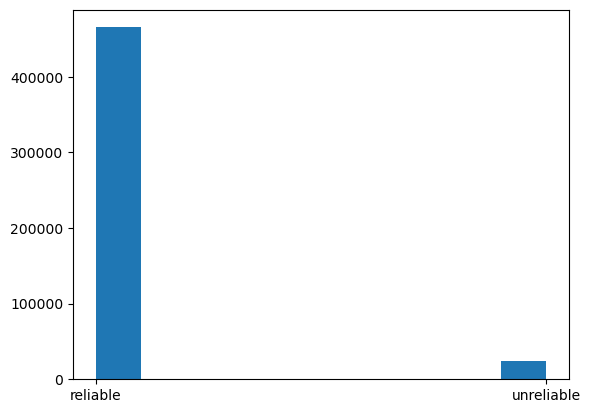

In [17]:
plt.hist(Ind_type2)

In [132]:
NG_score_low = []
for item in NG_score2:
    if item <=60:
        NG_score_low.append(item)

In [133]:
print(len(NG_score2))

583987


In [134]:
print(len(NG_score_low)/len(NG_score2))

0.03394767349273186


(array([564162.,      0.,      0.,  14446.,      0.,      0.,  19825.,
             0.,      0.,    599.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

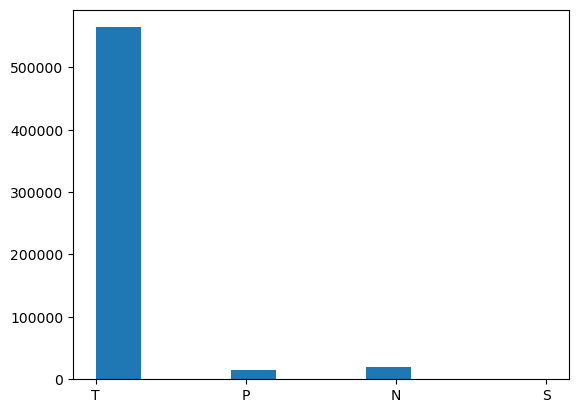

In [136]:
plt.hist(NG_rating2)